<img src="https://drive.google.com/uc?id=1B_R8TgTfQ1LhG5DWlNIomuyt2_CkjorZ" alt="Chicago Taxi Ride Analysis" width="500"/>


**TEAM 7**

**Team members**: Prateek Naharia,Linting Wang, Sifan Zhu, Jiadai Yu, Tyler Christoforo.


<a id='return'></a>

# 🚕 Chicago Taxi Ride Analysis
***

[ <font size="5">**Phase 1**</font>](#phase1)
***

I. [**Introduction**](#introduction)

   a. Motivation

   b. Objective

   c. Data description

II. [**Data Reading**](#datareading)

    a. Input Data

    b. Data Schema

    c. Gaining Data Understanding

III. [**Data Cleaning**](#datacleaning)

     a. Column Selection

     b. Spurious, Splits and Merges

     c. Imputing Nulls

[<font size="5">**Phase 2 - Team Assignment**</font>](#phase2)
***

IV. [**Data Analysis & Visualizations**](#QA)

    1. At what price point are customers most likely to take a taxi?

    2. What is the relation between fares and miles?

    3. What are the popular pickup and dropoff locations?

    4. Which Taxi Companies have the highest average tips?

    5. What is the correlation between Company, Miles, and Tips?

    6. What are the common payment types?
    
[ <font size="5">**Phase 3 - Final Deliverable**</font> ](#phase3)
***


3.1  [**Clustering Over Pickup**](#3.1)

3.2  [**Payment Method Trends (No Of Trips & Revenue)**](#3.2)

    1. Number of Trips with Payment Trend.
    
    2. Revenue with Payment Type Trend.

3.3  [**Correlation Between Fares, Tips, Duration)**](#3.3)

    1. The Distribution Of Trip Duration.
    
    2. Relationship Between Fares & Duration.
    
    3. Relationship Between Tips and Duration.

3.4  [**Chicago Taxi Companies Trends**](#3.4)
    
    1. Number of Trips, Revenue Earned from Companies.


IX. [**Conclusions**](#conclusions)

X. [**Reference**](#references)



***
## Introduction


**Problem definition**:

   After Uber and other taxi platforms took over the taxi market, it has left traditional taxi services quite vulnerable. Although these companies have looked into online platforms, they have long lost their original market shares. Therefore, this projects aims to focus on tradition taxi services' data and analyze trends and patterns to determine potential opportunities in aiding traditional taxi service companies.
    
**a.Motivation**

   In order to better provide aid to taxi service companies, the taxi trip dataset will help us gain insights on trends in the taxi industry. Moreover, these insights can be developed into business decisions relating to pricing, operation and marketing.
    Taxi services serve as a crucial means of transportation in urban regions, and examining taxi trip data can offer valuable insights for enhancing the quality, safety and effectiveness of these services.

**b.Objective**

Pricing:  This aspect will primarily come from an analysis on fare distributions and its relations to other variables like location and time.  This can be used as a source for price optimization.

Operation: By analyzing the distribution of trip durations, outliers and anomalies can be found and discussed. Thus providing reasons and evidence for allocation.

Marketing: A full look at the data will help detect trends like popularity of areas and patterns like time of day demands. These can come in useful for a tailored service to the market.



**c.Data description**

   Our first dataset comprises taxi trips recorded by the City of Chicago's regulatory agency from 2013 to the current date, totaling 206,021,251 entries. This dataset has 22 columns, including unique taxi id, trip duration in seconds, distance in miles, pickup and dropoff community areas, fare, tips, tolls, extras, total cost of the trip, payment method, company, pickup and dropoff location, and start and end times of each trip.

Main Data sourced from CityOfChicago - BigQuery Public Datasets. See Main Data sourced from CityOfChicago - BigQuery Public Datasets.  
[chicago_taxi_trips](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=chicago_taxi_trips&page=dataset).



Taxi Data Set Website Link  https://data.cityofchicago.org/

Taxi Data sourced from https://data.cityofchicago.org/Transportation/Taxi-Trips/wrvz-psew


*******

## Phase 1 Data Reading <a id='datareading'></a>

### Load Data

In [4]:
#Libraries 
from pyspark.sql.functions import to_date, min
from pyspark.sql.functions import year,sum,col,when
from pyspark.sql.functions import split, col
from pyspark.sql.types import *
from pyspark.sql.functions import isnan, isnull, sum
from pyspark.sql.functions import count
import matplotlib.pyplot as plt
from pyspark.sql.functions import count, expr
from pyspark.sql.functions import desc
from pyspark.sql import SparkSession
import seaborn as sns
import pandas as pd

In [2]:
data = "gs://team7projectdata/notebooks/jupyter/data/"

In [5]:
# create SparkSession object
spark = SparkSession.builder \
    .appName("MyApp") \
    .config("spark.jars.packages", "com.google.cloud.spark:spark-bigquery-with-dependencies_2.12:0.23.0") \
    .getOrCreate()

:: loading settings :: url = jar:file:/usr/lib/spark/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /root/.ivy2/cache
The jars for the packages stored in: /root/.ivy2/jars
com.google.cloud.spark#spark-bigquery-with-dependencies_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-b6457ab5-df97-4e4a-b1c5-3a515ead500c;1.0
	confs: [default]
	found com.google.cloud.spark#spark-bigquery-with-dependencies_2.12;0.23.0 in central
:: resolution report :: resolve 285ms :: artifacts dl 35ms
	:: modules in use:
	com.google.cloud.spark#spark-bigquery-with-dependencies_2.12;0.23.0 from central in [default]
	---------------------------------------------------------------------
	|                  |            modules            ||   artifacts   |
	|       conf       | number| search|dwnlded|evicted|| number|dwnlded|
	---------------------------------------------------------------------
	|      default     |   1   |   0   |   0   |   0   ||   1   |   0   |
	---------------------------------------------------------------------
:: retri

In [4]:
# load data from BigQuery
chicago_taxi = spark.read.format('bigquery').option('table', 'bigquery-public-data.chicago_taxi_trips.taxi_trips').load()

### Data Loading & Schema

In [1]:
from google.cloud import bigquery
from pyspark.sql.types import StructField, StructType, StringType, IntegerType, DoubleType
from pyspark.sql.functions import to_date, min
from pyspark.sql.functions import year,sum,col
from pyspark.sql import SparkSession

client = bigquery.Client()
data = "gs://team7projectdata/notebooks/jupyter/data/"
# create SparkSession object
spark = SparkSession.builder \
    .appName("MyApp") \
    .config("spark.jars.packages", "com.google.cloud.spark:spark-bigquery-with-dependencies_2.12:0.23.0") \
    .getOrCreate()

:: loading settings :: url = jar:file:/usr/lib/spark/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /root/.ivy2/cache
The jars for the packages stored in: /root/.ivy2/jars
com.google.cloud.spark#spark-bigquery-with-dependencies_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-643622e0-918d-4394-9806-42921d52009c;1.0
	confs: [default]
	found com.google.cloud.spark#spark-bigquery-with-dependencies_2.12;0.23.0 in central
:: resolution report :: resolve 355ms :: artifacts dl 18ms
	:: modules in use:
	com.google.cloud.spark#spark-bigquery-with-dependencies_2.12;0.23.0 from central in [default]
	---------------------------------------------------------------------
	|                  |            modules            ||   artifacts   |
	|       conf       | number| search|dwnlded|evicted|| number|dwnlded|
	---------------------------------------------------------------------
	|      default     |   1   |   0   |   0   |   0   ||   1   |   0   |
	---------------------------------------------------------------------
:: retri

In [2]:
from pyspark.sql import functions as F
from pyspark.sql.types import StructType, StringType, LongType, DoubleType, DateType, TimestampType, StructField
taxi_schema = StructType([
    StructField("taxi_id", StringType(), False),
    StructField("trip_seconds", LongType(), True),
    StructField("trip_miles", DoubleType(), True),
    StructField("pickup_community_area", LongType(), True),
    StructField("dropoff_community_area", LongType(), True),
    StructField("fare", DoubleType(), True),
    StructField("tips", DoubleType(), True),
    StructField("tolls", DoubleType(), True),
    StructField("extras", DoubleType(), True),
    StructField("trip_total", DoubleType(), True),
    StructField("payment_type", StringType(), True),
    StructField("company", StringType(), True),
    StructField("pickup_latitude", DoubleType(), True),
    StructField("pickup_longitude", DoubleType(), True),
    StructField("pickup_location", StringType(), True),
    StructField("dropoff_latitude", DoubleType(), True),
    StructField("dropoff_longitude", DoubleType(), True),
    StructField("dropoff_location", StringType(), True),
    StructField("trip_start_date", DateType(), True),
    StructField("trip_start_time", TimestampType(), True),
    StructField("trip_end_date", DateType(), True),
    StructField("trip_end_time", TimestampType(), True),
])

In [3]:
# Loading Data Set 
taxi = spark.read.format("csv")\
  .option("header", "true")\
  .schema(taxi_schema)\
  .load(data + "chicago-taxi/taxi_cg.csv")

taxi.printSchema()

root
 |-- taxi_id: string (nullable = true)
 |-- trip_seconds: long (nullable = true)
 |-- trip_miles: double (nullable = true)
 |-- pickup_community_area: long (nullable = true)
 |-- dropoff_community_area: long (nullable = true)
 |-- fare: double (nullable = true)
 |-- tips: double (nullable = true)
 |-- tolls: double (nullable = true)
 |-- extras: double (nullable = true)
 |-- trip_total: double (nullable = true)
 |-- payment_type: string (nullable = true)
 |-- company: string (nullable = true)
 |-- pickup_latitude: double (nullable = true)
 |-- pickup_longitude: double (nullable = true)
 |-- pickup_location: string (nullable = true)
 |-- dropoff_latitude: double (nullable = true)
 |-- dropoff_longitude: double (nullable = true)
 |-- dropoff_location: string (nullable = true)
 |-- trip_start_date: date (nullable = true)
 |-- trip_start_time: timestamp (nullable = true)
 |-- trip_end_date: date (nullable = true)
 |-- trip_end_time: timestamp (nullable = true)



In [4]:
taxi.limit(2).toPandas()

,taxi_id,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,...,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location,trip_start_date,trip_start_time,trip_end_date,trip_end_time
0,31c98812559ba5bad6de9a302a5412e5efff8f96a4af3e...,540,2.2,NaN,NaN,8.20,0.5,NaN,0.0,8.70,...,NaN,NaN,None,NaN,NaN,None,2018-02-08,2023-04-01 10:30:00,2018-02-08,2023-04-01 10:30:00
1,da76a5a1d1ef4c8428f4a218fe4782cafaa05bad1ca9a7...,3,0.0,NaN,NaN,0.01,0.0,NaN,0.0,0.01,...,NaN,NaN,None,NaN,NaN,None,2018-01-31,2023-04-01 09:00:00,2018-01-31,2023-04-01 09:00:00


In [5]:
taxi.cache()

DataFrame[taxi_id: string, trip_seconds: bigint, trip_miles: double, pickup_community_area: bigint, dropoff_community_area: bigint, fare: double, tips: double, tolls: double, extras: double, trip_total: double, payment_type: string, company: string, pickup_latitude: double, pickup_longitude: double, pickup_location: string, dropoff_latitude: double, dropoff_longitude: double, dropoff_location: string, trip_start_date: date, trip_start_time: timestamp, trip_end_date: date, trip_end_time: timestamp]

In [5]:
chicago_taxi.printSchema()

root
 |-- unique_key: string (nullable = false)
 |-- taxi_id: string (nullable = false)
 |-- trip_start_timestamp: timestamp (nullable = true)
 |-- trip_end_timestamp: timestamp (nullable = true)
 |-- trip_seconds: long (nullable = true)
 |-- trip_miles: double (nullable = true)
 |-- pickup_census_tract: long (nullable = true)
 |-- dropoff_census_tract: long (nullable = true)
 |-- pickup_community_area: long (nullable = true)
 |-- dropoff_community_area: long (nullable = true)
 |-- fare: double (nullable = true)
 |-- tips: double (nullable = true)
 |-- tolls: double (nullable = true)
 |-- extras: double (nullable = true)
 |-- trip_total: double (nullable = true)
 |-- payment_type: string (nullable = true)
 |-- company: string (nullable = true)
 |-- pickup_latitude: double (nullable = true)
 |-- pickup_longitude: double (nullable = true)
 |-- pickup_location: string (nullable = true)
 |-- dropoff_latitude: double (nullable = true)
 |-- dropoff_longitude: double (nullable = true)
 |-- dr

### Data Cleaning <a id='datacleaning'></a>

The taxi ride dataset updates frequently, which caused many operations to take a long time to respond. Therefore we have chose to drop certain years from the dataset. Backing this up with the null values in each column for the earlier years(2003 to 2017), and these early years have a large differene in environment. Thus, we had enough reasoning to only keep records from **2018 to 2022**. 

In [4]:
from pyspark.sql.functions import year,sum,col

# Group the DataFrame by year and count the number of rows per year
rows_per_year = chicago_taxi.groupBy(year('trip_start_timestamp').alias('year')).count()

# Order the results by year in ascending order
rows_per_year = rows_per_year.orderBy('year')

rows_per_year.show()

#Total number of trips
total_trips = rows_per_year.agg(sum(col("count"))).collect()[0][0]
print('Total Trips:', total_trips)


+----+--------+
|year|   count|
+----+--------+
|2013|27217300|
|2014|37395079|
|2015|32385527|
|2016|31756403|
|2017|24979611|
|2018|20731105|
|2019|16476440|
|2020| 3888831|
|2021| 3947677|
|2022| 6382071|
|2023|  861207|
+----+--------+



Total Trips: 206021251


In [ ]:
#minimum date in the chicago_taxi DataFrame
min_date_taxi = chicago_taxi.agg(min(to_date('trip_start_timestamp', 'yyyy-MM-dd')).alias('min_date')).collect()[0]['min_date']

# Display the minimum dates
print(f"The minimum date in the chicago_taxi DataFrame is {min_date_taxi}")

The minimum date in the chicago_taxi DataFrame is 2013-01-01

In [13]:
# Group the dataframe by year and count the number of null values
null_values_per_year = chicago_taxi.groupBy(year('trip_start_timestamp').alias('year')) \
    .agg(*[sum(when(col(c).isNull(), 1).otherwise(0)).alias(c + '_nulls')
           for c in chicago_taxi.columns])

# Show the null values per year
a_null = null_values_per_year.toPandas()
a_null

,year,unique_key_nulls,taxi_id_nulls,trip_start_timestamp_nulls,trip_end_timestamp_nulls,trip_seconds_nulls,trip_miles_nulls,pickup_census_tract_nulls,dropoff_census_tract_nulls,pickup_community_area_nulls,...,extras_nulls,trip_total_nulls,payment_type_nulls,company_nulls,pickup_latitude_nulls,pickup_longitude_nulls,pickup_location_nulls,dropoff_latitude_nulls,dropoff_longitude_nulls,dropoff_location_nulls
0,2014,0,0,0,5867,152247,52,12344522,12508340,4595917,...,228,228,0,10550573,4593756,4593756,4593756,5194741,5194741,5194741
1,2017,0,0,0,657,1441,484,8048172,8134193,2301224,...,588,588,0,0,2296761,2296761,2296761,2685412,2685412,2685412
2,2016,0,0,0,2414,3521,238,11130667,11030379,4289479,...,323,323,0,3501888,4283981,4283981,4283981,4500132,4500132,4500132
3,2022,0,0,0,211,1464,56,3758241,3706741,513501,...,3533,3533,0,0,511199,511199,511199,597579,597579,597579
4,2013,0,0,0,3433,1127793,208,10797271,11221939,4652198,...,271,271,0,9882406,4651696,4651696,4651696,5381590,5381590,5381590
5,2015,0,0,0,3590,6387,52,11299844,11458239,4327851,...,173,173,0,9658207,4326767,4326767,4326767,4898236,4898236,4898236
6,2018,0,0,0,350,2412,692,6388653,6473431,1428936,...,1294,1294,0,0,1423837,1423837,1423837,1814459,1814459,1814459
7,2019,0,0,0,545,2736,548,5594999,5692603,1237629,...,1571,1571,0,0,1235595,1235595,1235595,1599234,1599234,1599234
8,2021,0,0,0,745,1689,517,2804170,2816457,308564,...,604,604,0,0,307373,307373,307373,448550,448550,448550
9,2020,0,0,0,574,1549,30,2105938,2118411,278754,...,332,332,0,0,278052,278052,278052,361957,361957,361957


In [18]:
sorted_df = a_null.sort_values(by='year')
sorted_df

,year,unique_key_nulls,taxi_id_nulls,trip_start_timestamp_nulls,trip_end_timestamp_nulls,trip_seconds_nulls,trip_miles_nulls,pickup_census_tract_nulls,dropoff_census_tract_nulls,pickup_community_area_nulls,...,extras_nulls,trip_total_nulls,payment_type_nulls,company_nulls,pickup_latitude_nulls,pickup_longitude_nulls,pickup_location_nulls,dropoff_latitude_nulls,dropoff_longitude_nulls,dropoff_location_nulls
4,2013,0,0,0,3433,1127793,208,10797271,11221939,4652198,...,271,271,0,9882406,4651696,4651696,4651696,5381590,5381590,5381590
0,2014,0,0,0,5867,152247,52,12344522,12508340,4595917,...,228,228,0,10550573,4593756,4593756,4593756,5194741,5194741,5194741
5,2015,0,0,0,3590,6387,52,11299844,11458239,4327851,...,173,173,0,9658207,4326767,4326767,4326767,4898236,4898236,4898236
2,2016,0,0,0,2414,3521,238,11130667,11030379,4289479,...,323,323,0,3501888,4283981,4283981,4283981,4500132,4500132,4500132
1,2017,0,0,0,657,1441,484,8048172,8134193,2301224,...,588,588,0,0,2296761,2296761,2296761,2685412,2685412,2685412
6,2018,0,0,0,350,2412,692,6388653,6473431,1428936,...,1294,1294,0,0,1423837,1423837,1423837,1814459,1814459,1814459
7,2019,0,0,0,545,2736,548,5594999,5692603,1237629,...,1571,1571,0,0,1235595,1235595,1235595,1599234,1599234,1599234
9,2020,0,0,0,574,1549,30,2105938,2118411,278754,...,332,332,0,0,278052,278052,278052,361957,361957,361957
8,2021,0,0,0,745,1689,517,2804170,2816457,308564,...,604,604,0,0,307373,307373,307373,448550,448550,448550
3,2022,0,0,0,211,1464,56,3758241,3706741,513501,...,3533,3533,0,0,511199,511199,511199,597579,597579,597579


In [21]:
cg_taxi = chicago_taxi.filter(year('trip_start_timestamp').between(2018, 2022))
min_date_start = cg_taxi.agg(min(to_date('trip_start_timestamp', 'yyyy-MM-dd')).alias('min_date')).collect()[0]['min_date']
min_date_end = cg_taxi.agg(min(to_date('trip_end_timestamp', 'yyyy-MM-dd')).alias('min_date')).collect()[0]['min_date']

In [139]:
print('The Size or no of records in taxi dataset is 51426124')
#print('The Size or no of records in taxi dataset is ',cg_taxi.count())
#print(len(cg_taxi.columns))

The Size or no of records in taxi dataset is 51426124


In [25]:
print('Minimum Start Date',min_date_start)
print('Minimum End Date',min_date_end)

Minimum Start Date 2018-01-01
Minimum End Date 2003-02-11


Minimum End Date is still 2003 which is supposed to be greater than 2018

In [20]:
from pyspark.sql.functions import year

count_before_2018 = cg_taxi.filter(year('trip_end_timestamp') < 2018).count()

print('Number of rows with year < 2018 in trip_end_timestamp:', count_before_2018)

Number of rows with year < 2018 in trip_end_timestamp: 6


In [14]:
cg_taxi = cg_taxi.where(year('trip_end_timestamp') >= 2018) 

In [15]:
min_date_end = cg_taxi.agg(min(to_date('trip_end_timestamp', 'yyyy-MM-dd')).alias('min_date')).collect()[0]['min_date']

In [17]:
from pyspark.sql.functions import split, col
#splitting data and time
cg_taxi = cg_taxi.withColumn("trip_start_date", split(col("trip_start_timestamp"), " ")[0]) \
                 .withColumn("trip_start_time", split(col("trip_start_timestamp"), " ")[1]) \
                 .withColumn("trip_end_date", split(col("trip_end_timestamp"), " ")[0]) \
                 .withColumn("trip_end_time", split(col("trip_end_timestamp"), " ")[1]) \
                 .drop("trip_start_timestamp") \
                 .drop("trip_end_timestamp")

In [18]:
cg_taxi = cg_taxi.drop('pickup_census_tract', 'dropoff_census_tract', 'unique_key')
cg_taxi.limit(5).toPandas()

,taxi_id,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,...,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location,trip_start_date,trip_start_time,trip_end_date,trip_end_time
0,f54427c55effd88638382dbec9828c89fd2580d13c166a...,51,0.00,NaN,NaN,3.50,0.00,0.0,0.0,3.50,...,NaN,NaN,None,NaN,NaN,None,2022-03-31,15:45:00,2022-03-31,15:45:00
1,c7cc8a8dd5c3f7358d0f48468702ebd3a8fe989dfa9ee2...,780,0.10,NaN,NaN,9.25,3.00,0.0,0.0,12.25,...,NaN,NaN,None,NaN,NaN,None,2022-03-31,16:15:00,2022-03-31,16:30:00
2,ee0403d56ad861c2f3d4b1244497b07a47b61d3f9078de...,1298,9.89,NaN,NaN,86.45,4.58,0.0,0.0,91.03,...,NaN,NaN,None,NaN,NaN,None,2022-05-02,04:45:00,2022-05-02,05:15:00
3,340a2b2a073da248753976c9b31637b48a63d1589ae25e...,1747,25.16,NaN,NaN,61.00,12.30,0.0,0.0,73.80,...,NaN,NaN,None,NaN,NaN,None,2022-05-23,21:00:00,2022-05-23,21:30:00
4,24d4c5e51d147aecbb7c4a1ad70c38dbc05c7b4485f6de...,360,0.90,NaN,NaN,8.25,3.00,0.0,0.0,11.25,...,NaN,NaN,None,NaN,NaN,None,2022-05-10,23:45:00,2022-05-10,23:45:00


In [19]:
cg_taxi.count()

51423693

In [20]:
# Group the DataFrame by year and count the number of rows per year
rows_per_year = cg_taxi.groupBy(year('trip_start_date').alias('year')).count()
rows_per_year = rows_per_year.orderBy('year')
rows_per_year.show()

# Calculate the total number of trips
total_trips = rows_per_year.agg(sum(col("count"))).collect()[0][0]
print('Total Trips:', total_trips)


+----+--------+
|year|   count|
+----+--------+
|2018|20730752|
|2019|16475894|
|2020| 3888257|
|2021| 3946932|
|2022| 6381858|
+----+--------+



Total Trips: 51423693


In [22]:
taxi_cg = cg_taxi.repartition(20)
print("data was re-partitioned to {} partitions!".format(cg_taxi.rdd.getNumPartitions()))
spark.conf.set("spark.sql.shuffle.partitions", "20")
taxi_cg.cache()

data was re-partitioned to 77 partitions!


23/04/01 00:51:29 WARN CacheManager: Asked to cache already cached data.


DataFrame[taxi_id: string, trip_seconds: bigint, trip_miles: double, pickup_community_area: bigint, dropoff_community_area: bigint, fare: double, tips: double, tolls: double, extras: double, trip_total: double, payment_type: string, company: string, pickup_latitude: double, pickup_longitude: double, pickup_location: string, dropoff_latitude: double, dropoff_longitude: double, dropoff_location: string, trip_start_date: string, trip_start_time: string, trip_end_date: string, trip_end_time: string]

In [23]:
#Saving the Dataframe in Google Cloud Storage for further analysis.
taxi_cg.write.format("csv").mode("overwrite").option("header", "true").save("gs://team7projectdata/notebooks/jupyter/data/chicago-taxi/taxi_cg.csv")

In [33]:
#Reading the file saved in Bucket
taxi = spark.read.format("csv")\
  .option("header", "true")\
  .load(data + "chicago-taxi/taxi_cg.csv")
#team7projectdata/notebooks/jupyter/data/chicago-taxi/taxi_cg.csv

In [32]:
taxi.limit(2).toPandas()

,taxi_id,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,...,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location,trip_start_date,trip_start_time,trip_end_date,trip_end_time
0,31c98812559ba5bad6de9a302a5412e5efff8f96a4af3e...,540,2.2,None,None,8.2,0.5,None,0.0,8.7,...,None,None,None,None,None,None,2018-02-08,10:30:00,2018-02-08,10:30:00
1,da76a5a1d1ef4c8428f4a218fe4782cafaa05bad1ca9a7...,3,0.0,None,None,0.01,0.0,None,0.0,0.01,...,None,None,None,None,None,None,2018-01-31,09:00:00,2018-01-31,09:00:00


In [35]:
taxi.cache()
#Re-partitioned as taxi_cg, therefore calling taxi_cg.

DataFrame[taxi_id: string, trip_seconds: string, trip_miles: string, pickup_community_area: string, dropoff_community_area: string, fare: string, tips: string, tolls: string, extras: string, trip_total: string, payment_type: string, company: string, pickup_latitude: string, pickup_longitude: string, pickup_location: string, dropoff_latitude: string, dropoff_longitude: string, dropoff_location: string, trip_start_date: string, trip_start_time: string, trip_end_date: string, trip_end_time: string]

Examining the null values of the new filtered dataset, there are still many of them in both columns and rows. The strategy was to impute the ones if possible and drop the ones with too many null values.

In [54]:
from pyspark.sql.functions import isnan, isnull, sum
null_counts = {}

for col in taxi_cg.columns:
    null_count = taxi_cg.filter(isnull(col) | isnan(col)).count()
    null_counts[col] = null_count

# Create a DataFrame from the dictionary
null_counts_df = spark.createDataFrame(list(null_counts.items()), ["column", "null_count"])
null_counts_df.show()


+--------------------+----------+
|              column|null_count|
+--------------------+----------+
|             taxi_id|         0|
|        trip_seconds|      7419|
|          trip_miles|      1843|
|pickup_community_...|   3767038|
|dropoff_community...|   5006450|
|                fare|      7334|
|                tips|      7334|
|               tolls|   4466238|
|              extras|      7334|
|          trip_total|      7334|
|        payment_type|         0|
|             company|         0|
|     pickup_latitude|   3755710|
|    pickup_longitude|   3755710|
|     pickup_location|   3755710|
|    dropoff_latitude|   4819353|
|   dropoff_longitude|   4819353|
|    dropoff_location|   4819353|
|     trip_start_date|         0|
|     trip_start_time|         0|
+--------------------+----------+
only showing top 20 rows



Counting null Values in each column after filtering 2018<Dataset<2022

In [57]:
from pyspark.sql.functions import col

distinct_pickup = taxi_cg.select(col("pickup_community_area")).distinct()
distinct_dropoff = taxi_cg.select(col("dropoff_community_area")).distinct()

# Show the distinct values
distinct_pickup.show()
distinct_dropoff.show()


+---------------------+
|pickup_community_area|
+---------------------+
|                    4|
|                   61|
|                   29|
|                   26|
|                   11|
|                   65|
|                   59|
|                   49|
|                 null|
|                   60|
|                   35|
|                   57|
|                   41|
|                   13|
|                   71|
|                   28|
|                   33|
|                   19|
|                   15|
|                   54|
+---------------------+
only showing top 20 rows



+----------------------+
|dropoff_community_area|
+----------------------+
|                    29|
|                     4|
|                    61|
|                    26|
|                    59|
|                    65|
|                    11|
|                    49|
|                  null|
|                    60|
|                    35|
|                    57|
|                    41|
|                    13|
|                    71|
|                    28|
|                    19|
|                    33|
|                    15|
|                    54|
+----------------------+
only showing top 20 rows



In [81]:
from pyspark.sql.functions import count

# Count the occurrences of each value in pickup_community_area
pickup_counts = taxi_cg.groupBy("pickup_community_area").agg(count("*").alias("count")).orderBy("count", ascending=False)

# Count the occurrences of each value in dropoff_community_area
dropoff_counts = taxi_cg.groupBy("dropoff_community_area").agg(count("*").alias("count")).orderBy("count", ascending=False)
pickup_counts.show()
dropoff_counts.show()

+---------------------+--------+
|pickup_community_area|   count|
+---------------------+--------+
|                    8|14475624|
|                   32|12141661|
|                   28| 5079793|
|                   76| 5067274|
|                 null| 3766390|
|                    6| 1694691|
|                   33| 1437255|
|                    7| 1129002|
|                   56| 1084960|
|                    3|  590619|
|                   24|  578055|
|                   77|  469751|
|                    2|  271437|
|                    1|  241974|
|                   41|  227820|
|                   22|  219358|
|                   16|  205417|
|                    4|  186094|
|                   35|  160488|
|                    5|  124453|
+---------------------+--------+
only showing top 20 rows



+----------------------+--------+
|dropoff_community_area|   count|
+----------------------+--------+
|                     8|13922868|
|                    32|10031665|
|                    28| 5268020|
|                  null| 5005760|
|                     6| 2159632|
|                     7| 2064540|
|                    76| 2009290|
|                    33| 1688700|
|                    24| 1527266|
|                     3|  773640|
|                    77|  587512|
|                    56|  551521|
|                    22|  548776|
|                     5|  329875|
|                     2|  316981|
|                     4|  310021|
|                    41|  307813|
|                     1|  293799|
|                    16|  291936|
|                    35|  212502|
+----------------------+--------+
only showing top 20 rows



In [72]:
from pyspark.sql.functions import to_date

cg_taxi = cg_taxi.withColumn("trip_start_date", to_date("trip_start_date", "MM/dd/yyyy"))
cg_taxi = cg_taxi.withColumn("trip_end_date", to_date("trip_end_date", "MM/dd/yyyy"))

from pyspark.sql.functions import to_timestamp

cg_taxi = cg_taxi.withColumn("trip_start_time", to_timestamp("trip_start_time", "MM/dd/yyyy HH:mm:ss"))
cg_taxi = cg_taxi.withColumn("trip_end_time", to_timestamp("trip_end_time", "MM/dd/yyyy HH:mm:ss"))


In [73]:
cg_taxi.printSchema()

root
 |-- taxi_id: string (nullable = false)
 |-- trip_seconds: long (nullable = true)
 |-- trip_miles: double (nullable = true)
 |-- pickup_community_area: long (nullable = true)
 |-- dropoff_community_area: long (nullable = true)
 |-- fare: double (nullable = true)
 |-- tips: double (nullable = true)
 |-- tolls: double (nullable = true)
 |-- extras: double (nullable = true)
 |-- trip_total: double (nullable = true)
 |-- payment_type: string (nullable = true)
 |-- company: string (nullable = true)
 |-- pickup_latitude: double (nullable = true)
 |-- pickup_longitude: double (nullable = true)
 |-- pickup_location: string (nullable = true)
 |-- dropoff_latitude: double (nullable = true)
 |-- dropoff_longitude: double (nullable = true)
 |-- dropoff_location: string (nullable = true)
 |-- trip_start_date: date (nullable = true)
 |-- trip_start_time: timestamp (nullable = true)
 |-- trip_end_date: date (nullable = true)
 |-- trip_end_time: timestamp (nullable = true)



In [78]:
from pyspark.sql.functions import isnull, sum

# Count the number of null values in each row
null_counts = taxi_cg.select([sum(isnull(c).cast('int')).alias(c) for c in taxi_cg.columns])

# Show the count of null values in each column
null_counts.show()

# Drop the rows where more than 13 columns are null
taxi_cg = taxi_cg.na.drop(thresh=13)

+-------+------------+----------+---------------------+----------------------+----+----+-------+------+----------+------------+-------+---------------+----------------+---------------+----------------+-----------------+----------------+---------------+---------------+-------------+-------------+
|taxi_id|trip_seconds|trip_miles|pickup_community_area|dropoff_community_area|fare|tips|  tolls|extras|trip_total|payment_type|company|pickup_latitude|pickup_longitude|pickup_location|dropoff_latitude|dropoff_longitude|dropoff_location|trip_start_date|trip_start_time|trip_end_date|trip_end_time|
+-------+------------+----------+---------------------+----------------------+----+----+-------+------+----------+------------+-------+---------------+----------------+---------------+----------------+-----------------+----------------+---------------+---------------+-------------+-------------+
|      0|        7366|      1718|              3766390|               5005760|6637|6637|4465535|  6637|      

Setting a threshold to determine which rows to drop, 13 was selected based on the features of interest. Another rationale was if the row has half of the columns missing, the row would be dropped

In [77]:
null_counts.limit(3).toPandas()

,taxi_id,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,...,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location,trip_start_date,trip_start_time,trip_end_date,trip_end_time
0,0,7366,1718,3766390,5005760,6637,6637,4465535,6637,6637,...,3755062,3755062,3755062,4818674,4818674,4818674,0,0,0,0


Imputation

In [91]:
from pyspark.sql.functions import col

# Calculate the mode of pickup_community_area
mode_value = taxi_cg.groupBy("pickup_community_area").count().orderBy(col("count").desc()).first()[0]
mode_value


8

In [92]:
mode_value = taxi_cg.groupBy("dropoff_community_area").count().orderBy(col("count").desc()).first()[0]
mode_value

8

In [ ]:
taxi_cg = taxi_cg.fillna({"pickup_community_area": mode_value})

In [96]:
from pyspark.sql.functions import col

taxi_cg_filtered = taxi_cg.filter(col("pickup_community_area").isNotNull() | \
                                   col("dropoff_community_area").isNotNull() | \
                                   col("dropoff_location").isNotNull() | \
                                   col("dropoff_longitude").isNotNull() | \
                                   col("dropoff_latitude").isNotNull() | \
                                   col("pickup_latitude").isNotNull() | \
                                   col("pickup_longitude").isNotNull() | \
                                   col("pickup_location").isNotNull())
taxi_cg_filtered.count()
#effectively dropping the records where all of them are null together.

48470991

In [98]:
taxi_cg.write.format("csv").mode("overwrite").option("header", "true").save("gs://team7projectdata/notebooks/jupyter/data/chicago-taxi/taxi_cg.csv")

### Feature Selection

After a final filtered version of the dataset, we can now drop all the columns that are not of interest. Pick up and drop off location was dropped because longtitude and latitude columns already exist. Taxi Id was added to serve as an index. Additionally, we dropped the null values in pick up community area and drop off community area.

In [32]:
taxi = spark.read.format("csv")\
  .option("header", "true")\
  .load(data + "chicago-taxi/taxi_cg.csv")
taxi.printSchema()
taxi.show(1, False)

root
 |-- taxi_id: string (nullable = true)
 |-- trip_seconds: string (nullable = true)
 |-- trip_miles: string (nullable = true)
 |-- pickup_community_area: string (nullable = true)
 |-- dropoff_community_area: string (nullable = true)
 |-- fare: string (nullable = true)
 |-- tips: string (nullable = true)
 |-- tolls: string (nullable = true)
 |-- extras: string (nullable = true)
 |-- trip_total: string (nullable = true)
 |-- payment_type: string (nullable = true)
 |-- company: string (nullable = true)
 |-- pickup_latitude: string (nullable = true)
 |-- pickup_longitude: string (nullable = true)
 |-- pickup_location: string (nullable = true)
 |-- dropoff_latitude: string (nullable = true)
 |-- dropoff_longitude: string (nullable = true)
 |-- dropoff_location: string (nullable = true)
 |-- trip_start_date: string (nullable = true)
 |-- trip_start_time: string (nullable = true)
 |-- trip_end_date: string (nullable = true)
 |-- trip_end_time: string (nullable = true)

+------------------

In [35]:
taxi = taxi.drop("dropoff_location", "pickup_location") #Since the columns are same as lat & longitudes

In [36]:
from pyspark.sql.functions import monotonically_increasing_id

taxi = taxi.withColumn("taxi_id", monotonically_increasing_id())


Exception in thread "serve-DataFrame" java.net.SocketTimeoutException: Accept timed out
	at java.base/java.net.PlainSocketImpl.socketAccept(Native Method)
	at java.base/java.net.AbstractPlainSocketImpl.accept(AbstractPlainSocketImpl.java:474)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:565)
	at java.base/java.net.ServerSocket.accept(ServerSocket.java:533)
	at org.apache.spark.security.SocketAuthServer$$anon$1.run(SocketAuthServer.scala:64)


In [37]:
taxi.limit(1).toPandas()

,taxi_id,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,trip_start_date,trip_start_time,trip_end_date,trip_end_time
0,0,540,2.2,None,None,8.2,0.5,None,0.0,8.7,Credit Card,303 Taxi,None,None,None,None,2018-02-08,10:30:00,2018-02-08,10:30:00


In [14]:
taxi = taxi.drop("id")

In [38]:
taxi.cache()

DataFrame[taxi_id: bigint, trip_seconds: string, trip_miles: string, pickup_community_area: string, dropoff_community_area: string, fare: string, tips: string, tolls: string, extras: string, trip_total: string, payment_type: string, company: string, pickup_latitude: string, pickup_longitude: string, dropoff_latitude: string, dropoff_longitude: string, trip_start_date: string, trip_start_time: string, trip_end_date: string, trip_end_time: string]

In [2]:
taxi.write.format("csv").option("header", "true").save("gs://team7projectdata/notebooks/jupyter/data/chicago-taxi/taxi_cg_f.csv")

In [40]:
taxi = taxi.dropna(subset=["pickup_latitude", "pickup_longitude", "dropoff_latitude", "dropoff_longitude"])


In [46]:
taxi.limit(1).toPandas()

,taxi_id,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,trip_start_date,trip_start_time,trip_end_date,trip_end_time
0,28,1415,10.82,32,69,29.25,0.0,0.0,0.0,29.25,Prcard,Flash Cab,41.878865584,-87.625192142,41.763246799,-87.616134111,2022-10-22,13:15:00,2022-10-22,13:30:00


In [50]:
taxi.cache()

23/04/01 20:38:17 WARN CacheManager: Asked to cache already cached data.


DataFrame[taxi_id: bigint, trip_seconds: string, trip_miles: string, pickup_community_area: string, dropoff_community_area: string, fare: string, tips: string, tolls: string, extras: string, trip_total: string, payment_type: string, company: string, pickup_latitude: string, pickup_longitude: string, dropoff_latitude: string, dropoff_longitude: string, trip_start_date: string, trip_start_time: string, trip_end_date: string, trip_end_time: string]

In [51]:
from pyspark.sql.functions import isnull, when, count

# count the null values in each column
null_counts = taxi.select([count(when(isnull(c), c)).alias(c) for c in taxi.columns]).toPandas()
null_counts

,taxi_id,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,trip_start_date,trip_start_time,trip_end_date,trip_end_time
0,0,5058,1634,11065,174129,6000,6000,3853066,6000,6000,0,0,0,0,0,0,0,0,0,0


In [53]:
taxi = taxi.dropna(subset=["pickup_community_area"])
taxi = taxi.dropna(subset=["dropoff_community_area"])


In [54]:
null_counts = taxi.select([count(when(isnull(c), c)).alias(c) for c in taxi.columns]).toPandas()
null_counts

,taxi_id,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,trip_start_date,trip_start_time,trip_end_date,trip_end_time
0,0,5045,1626,0,0,5955,5955,3837463,5955,5955,0,0,0,0,0,0,0,0,0,0


In [56]:
taxi.write.format("csv").option("header", "true").save("gs://team7projectdata/notebooks/jupyter/data/chicago-taxi/chicagotaxi.csv")

In [57]:
taxi.cache()

DataFrame[taxi_id: bigint, trip_seconds: string, trip_miles: string, pickup_community_area: string, dropoff_community_area: string, fare: string, tips: string, tolls: string, extras: string, trip_total: string, payment_type: string, company: string, pickup_latitude: string, pickup_longitude: string, dropoff_latitude: string, dropoff_longitude: string, trip_start_date: string, trip_start_time: string, trip_end_date: string, trip_end_time: string]

## Phase 2: EDA on Chicago Taxi Dataset <a id='QA'></a>

[return to top](#return)

In this phase, we stand on a big picture to explore the correlations between the attributes, investigating which factors have a relationship with each other. 

### Question 1: At what price point are customers most likely to take a taxi?

Before drawing the plot for the distribution of taxi fares and trip miles in Chicago, we first remove some rows that are out of Chicago travelling distance for taxi trips. Specifically, we drop 7,234 rows where the fare is greater than $200 and 741 rows where the trip distance is longer than 200 miles.

In [1]:
from google.cloud import bigquery
from pyspark.sql.types import StructField, StructType, StringType, IntegerType, DoubleType
from pyspark.sql.functions import to_date, min
from pyspark.sql.functions import year,sum,col
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.types import StructType, StringType, LongType, DoubleType, DateType, TimestampType, StructField
#################################################################
client = bigquery.Client()
data = "gs://team7projectdata/notebooks/jupyter/data/"

####### create SparkSession object ##############################
spark = SparkSession.builder \
    .appName("MyApp") \
    .config("spark.jars.packages", "com.google.cloud.spark:spark-bigquery-with-dependencies_2.12:0.23.0") \
    .getOrCreate()

#######################SCHEMA DECLARATION ##########################################

taxi_schema = StructType([
    StructField("taxi_id", StringType(), False),
    StructField("trip_seconds", LongType(), True),
    StructField("trip_miles", DoubleType(), True),
    StructField("pickup_community_area", LongType(), True),
    StructField("dropoff_community_area", LongType(), True),
    StructField("fare", DoubleType(), True),
    StructField("tips", DoubleType(), True),
    StructField("tolls", DoubleType(), True),
    StructField("extras", DoubleType(), True),
    StructField("trip_total", DoubleType(), True),
    StructField("payment_type", StringType(), True),
    StructField("company", StringType(), True),
    StructField("pickup_latitude", DoubleType(), True),
    StructField("pickup_longitude", DoubleType(), True),
    StructField("pickup_location", StringType(), True),
    StructField("dropoff_latitude", DoubleType(), True),
    StructField("dropoff_longitude", DoubleType(), True),
    StructField("dropoff_location", StringType(), True),
    StructField("trip_start_date", DateType(), True),
    StructField("trip_start_time", TimestampType(), True),
    StructField("trip_end_date", DateType(), True),
    StructField("trip_end_time", TimestampType(), True),
])

####################### Loading Data SET ##########################################
taxi = spark.read.format("csv")\
  .option("header", "true")\
  .schema(taxi_schema)\
  .load(data + "chicago-taxi/chicagotaxi.csv")

# taxi.printSchema()
# taxi.limit(2).toPandas()

# Setting the number of shuffle partitions
#spark.conf.set("spark.sql.shuffle.partitions", "20")

####################### Caching ###################################################
taxi.cache()

:: loading settings :: url = jar:file:/usr/lib/spark/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /root/.ivy2/cache
The jars for the packages stored in: /root/.ivy2/jars
com.google.cloud.spark#spark-bigquery-with-dependencies_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-56d6b8b0-6760-4e0f-bf7d-baf6ac3c1e5c;1.0
	confs: [default]
	found com.google.cloud.spark#spark-bigquery-with-dependencies_2.12;0.23.0 in central
:: resolution report :: resolve 524ms :: artifacts dl 19ms
	:: modules in use:
	com.google.cloud.spark#spark-bigquery-with-dependencies_2.12;0.23.0 from central in [default]
	---------------------------------------------------------------------
	|                  |            modules            ||   artifacts   |
	|       conf       | number| search|dwnlded|evicted|| number|dwnlded|
	---------------------------------------------------------------------
	|      default     |   1   |   0   |   0   |   0   ||   1   |   0   |
	---------------------------------------------------------------------
:: retri

DataFrame[taxi_id: string, trip_seconds: bigint, trip_miles: double, pickup_community_area: bigint, dropoff_community_area: bigint, fare: double, tips: double, tolls: double, extras: double, trip_total: double, payment_type: string, company: string, pickup_latitude: double, pickup_longitude: double, pickup_location: string, dropoff_latitude: double, dropoff_longitude: double, dropoff_location: string, trip_start_date: date, trip_start_time: timestamp, trip_end_date: date, trip_end_time: timestamp]

In [2]:
taxi.count()

45625769

In [7]:
taxi.cache() 

23/04/04 01:41:14 WARN CacheManager: Asked to cache already cached data.


DataFrame[taxi_id: string, trip_seconds: bigint, trip_miles: double, pickup_community_area: bigint, dropoff_community_area: bigint, fare: double, tips: double, tolls: double, extras: double, trip_total: double, payment_type: string, company: string, pickup_latitude: double, pickup_longitude: double, pickup_location: string, dropoff_latitude: double, dropoff_longitude: double, dropoff_location: string, trip_start_date: date, trip_start_time: timestamp, trip_end_date: date, trip_end_time: timestamp]

In [3]:
taxi.where(taxi.fare > 200).describe(['fare']).show()

In [41]:
taxi.where(taxi.trip_miles > 200).describe(['trip_miles']).show()

+-------+------------------+
|summary|        trip_miles|
+-------+------------------+
|  count|               741|
|   mean| 547.1613495276653|
| stddev|464.42040122921617|
|    min|            200.22|
|    max|           3430.53|
+-------+------------------+



In [6]:
taxi = taxi.where((taxi.fare <= 200) & (taxi.trip_miles <= 200))
taxi = taxi.cache()

Plot the fare distribution for ease of visualization.

/tmp/ipykernel_3025/1096789893.py:9: UserWarning:                               

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pandas_df)


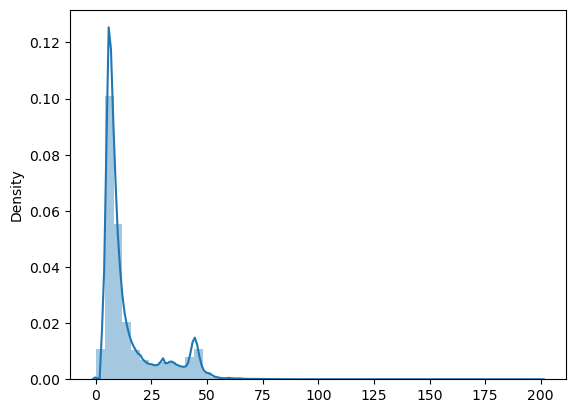

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a single column and sample and convert to pandas
sample_df = taxi.select(['fare']).sample(False, 0.5, 42)
pandas_df = sample_df.toPandas()

# Plot distribution of pandas_df and display plot
sns.distplot(pandas_df)
plt.xlabel("Trip Miles")
plt.title("Distribution of Trip Distances")
plt.show()

After analyzing the fare distribution for each trip, we discovered that the fares have two distinct peaks. The first peak, happens around 10 dollars, possibly represents a cluster of lower-priced fares. While the second peak, around 45 dollars, possibly represents a cluster of higher-priced fares. This finding suggests that there may be two different types of passenger behavior when taking a taxi.

The first peak indicates that people may prefer lower-priced fares because: 

1) They are price-sensitive and want to take a taxi when the fare is low, even for short distances.

2) They may need to pass through dangerous areas, making them more likely to take a taxi rather than other transportations. 

The second peak is more straightforward, indicating that higher fares are likely due to longer distances.

### Question 2: What is the relation between fares and miles?

In [13]:
# Select a the relevant columns and sample
sample_df = taxi.select(['trip_miles', 'fare']).sample(False, 0.5, 42)
# Convert to pandas dataframe
pandas_df = sample_df.toPandas()

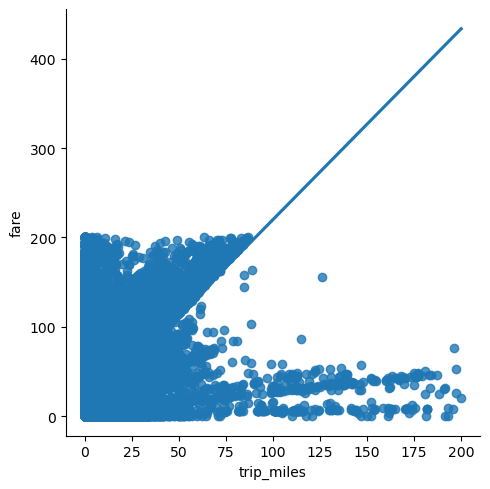

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Linear model plot of pandas_df
sns.lmplot(x='trip_miles', y= 'fare', data=pandas_df)
plt.show()

The correlation between miles and taxi fares is subject to various factors such as location, time of day, and the taxi service provider. Generally, longer distances result in higher fares, as shown in the correlation plot. Although the pricing structure is complex, the plot reveals some interesting patterns:
1. For trips under 60 miles, fares vary widely, ranging from 0 to 200 dollars. This variation may be due to factors such as traffic, and tolls.
2. This plot shows two patterns that resemble regression lines for trips longer than 60 miles, located near the bottom of the x-axis.  Indicating that different pricing strategies may be at play. Although these trips cover a long distance, most fares are under 100 dollars, suggesting that customers may have discounts or share rides with others.

### Question 3: What are the popular pickup and dropoff locations?

To analyze this question accurately, we added community areas with codes. This is directly taken from an area map of Chicago. 

In [141]:
import pandas as pd

# Load the community code and name
community_area = [("1", "Rogers Park"),("2", "West Ridge"),("3", "Uptown"),("4", "Lincoln Square"),("5", "North Center"),("6", "Lake View"),("7", "Lincoln Park"),("8", "Near North Side"),("9", "Edison Park"),("10", "Norwood Park"),
                  ("11", "Jefferson Park"),("12", "Forest Glen"),("13", "North Park"),("14", "Albany Park"),("15", "Portage Park"),("16", "Irving Park"),("17", "Dunning"),("18", "Montclare"),("19", "Belmont Cragin"),("20", "Hermosa"),
                  ("21", "Avondale"),("22", "Logan Square"),("23", "Humboldt Park"),("24", "West Town"),("25", "Austin"),("26", "West Garfield Park"),("27", "East Garfield Park"),("28", "Near West Side"),("29", "North Lawndale"),("30", "South Lawndale"),
                  ("31", "Lower West Side"),("32", "Loop"),("33", "Near South Side"),("34", "Armour Square"),("35", "Douglas"),("36", "Oakland"),("37", "Fuller Park"),("38", "Grand Boulevard"),("39", "Kenwood"),("40", "Washington Park"),
                  ("41", "Hyde Park"),("42", "Woodlawn"),("43", "South Shore"),("44", "Chatham"),("45", "Avalon Park"),("46", "South Chicago"),("47", "Burnside"),("48", "Calumet Heights"),("49", "Roseland"),("50", "Pullman"),
                  ("51", "South Deering"),("52", "East Side"),("53", "West Pullman"),("54", "Riverdale"),("55", "Hegewisch"),("56", "Garfield Ridge"),("57", "Archer Heights"),("58", "Brighton Park"),("59", "McKinley Park"),("60", "Bridgeport"),
                  ("61", "New City"),("62", "West Elsdon"),("63", "Gage Park"),("64", "Clearing"),("65", "West Lawn"),("66", "Chicago Lawn"),("67", "West Englewood"),("68", "Englewood"),("69", "Greater Grand Crossing"),("70", "Ashburn"),
                  ("71", "Auburn Gresham"),("72", "Beverly"),("73", "Washington Heights"),("74", "Mount Greenwood"),("75", "Morgan Park"),("76", "O'Hare"),("77", "Edgewater")]

community_area_name = pd.DataFrame(community_area, columns=['community_area', 'community_name'])
community_area_name['community_area'] = community_area_name['community_area'].astype('int64')

In [179]:
sample_df_community = taxi.select(['taxi_id','pickup_community_area','dropoff_community_area','pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude','trip_miles','fare','tips'])\
                                .sample(False, 0.0001, 42)
pandas_df_community = sample_df_community.toPandas()

In [143]:
pickup_community_area = pandas_df_community.groupby('pickup_community_area').count()\
                        .rename(columns={'taxi_id': 'pickup_community_count'})\
                        .reset_index().set_index('pickup_community_area')

dropoff_community_area = pandas_df_community.groupby('dropoff_community_area').count()\
                        .rename(columns={'taxi_id': 'dropoff_community_count'})\
                        .reset_index().set_index('dropoff_community_area')

taxi_community_area = pickup_community_area[['pickup_community_count']] \
                      .merge(dropoff_community_area[['dropoff_community_count']], \
                             left_index=True, right_index=True, how='left')\
                    .where((pickup_community_area['pickup_community_count'] > 50) & \
                           (dropoff_community_area['dropoff_community_count'] > 50))\
                    .reset_index()\
                    .rename(columns={'pickup_community_area': 'community_area'})
taxi_community_area['community_area'] = taxi_community_area['community_area'].astype('int64')

taxi_community_name = taxi_community_area.merge(community_area_name, on='community_area').dropna().set_index('community_name')

taxi_community_name

,community_area,pickup_community_count,dropoff_community_count
community_name,,,
Uptown,3,67.0,84.0
Lake View,6,157.0,219.0
Lincoln Park,7,115.0,191.0
Near North Side,8,1442.0,1414.0
West Town,24,58.0,139.0
Near West Side,28,503.0,508.0
Loop,32,1167.0,978.0
Near South Side,33,130.0,169.0
Garfield Ridge,56,81.0,59.0


Text(0.5, 1.0, 'Common Pickup and Dropoff Communities')

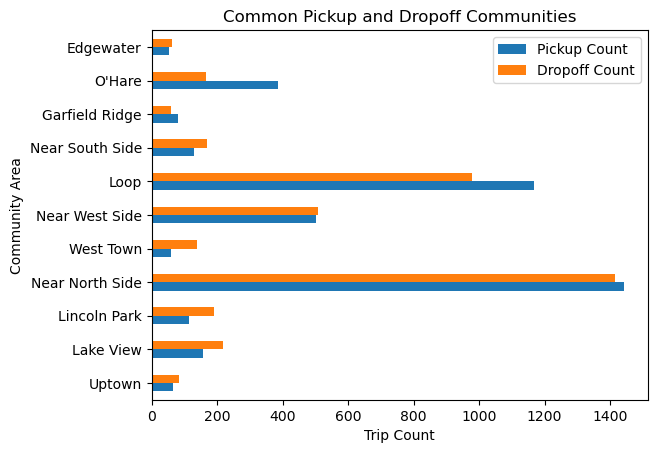

In [144]:
taxi_community_name[['pickup_community_count','dropoff_community_count']].plot.barh()
plt.xlabel('Trip Count')
plt.ylabel('Community Area')
plt.legend(labels=['Pickup Count', 'Dropoff Count'])
plt.title('Common Pickup and Dropoff Communities')

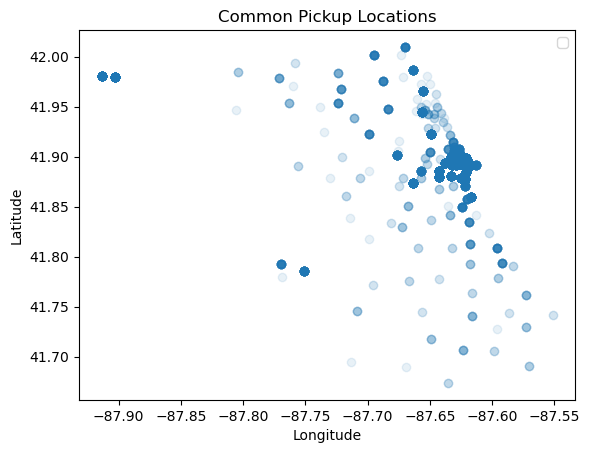

In [48]:
plt.figure()
plt.scatter(pandas_df_community['pickup_longitude'], pandas_df_community['pickup_latitude'], alpha=0.1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Common Pickup Locations')
plt.legend()

The most popular areas for pick up and drop off tend to correlate, in which a popular pick up area is also a popular drop off area.The more popular areas are Near North Side, Loop, Near West Side and O'Hare.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/Chicago_Community_Areas.svg/690px-Chicago_Community_Areas.svg.png" width="450" align="left"/>
<img src="https://github.com/soltaniehha/Big-Data-Analytics-for-Business/blob/master/figs/07-01-Chicago.png?raw=true" width="450" align="right"/>

### Question 4: Which Taxi Companies have the highest average tips?

In [4]:
from pyspark.sql.functions import sum, count, avg, expr, desc
# df_tip_mile = taxi.select("trip_miles","tips").sample(withReplacement = False, fraction = 0.005, seed = 42).toPandas().head()
 
dfcomp_tips = taxi.groupBy('company').agg(avg('tips').alias("avg_tips")).orderBy(desc("avg_tips")).toPandas()

dfcomp_tips


,company,avg_tips
0,2809 - 95474 C & D Cab Co Inc.,5.991667
1,4053 - 40193 Adwar H. Nikola,4.905277
2,"2241 - 44667 - Felman Corp, Manuel Alonso",4.360563
3,Petani Cab Corp,4.222615
4,2733 - 74600 Benny Jona,3.709306
...,...,...
76,6743 - 78771 Luhak Corp,0.654435
77,Norshore Cab,0.270183
78,3556 - 36214 RC Andrews Cab,0.108872
79,2092 - 61288 Sbeih company,0.072050


In [5]:
dfcomp_tips = dfcomp_tips.head(5)
dfcomp_tips

,company,avg_tips
0,2809 - 95474 C & D Cab Co Inc.,5.991667
1,4053 - 40193 Adwar H. Nikola,4.905277
2,"2241 - 44667 - Felman Corp, Manuel Alonso",4.360563
3,Petani Cab Corp,4.222615
4,2733 - 74600 Benny Jona,3.709306


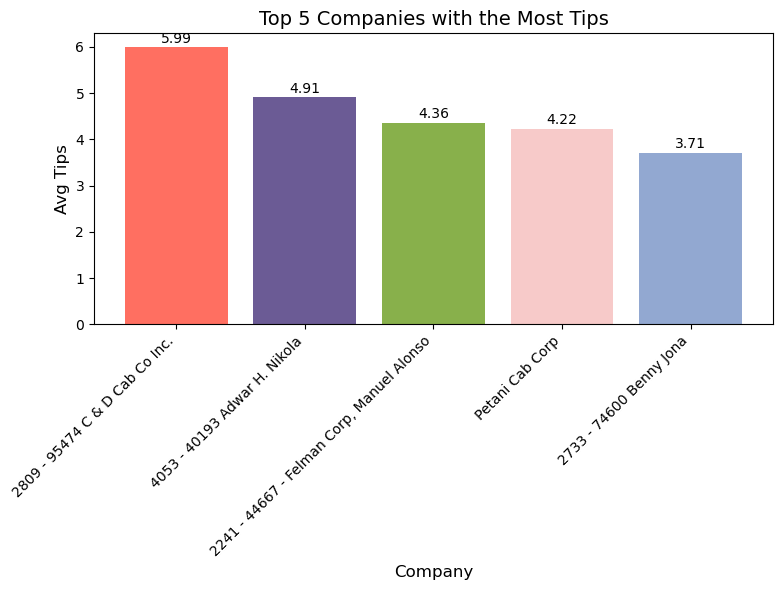

In [8]:
#  color palette
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1']
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(dfcomp_tips['company'], dfcomp_tips['avg_tips'], color=colors)
for i, v in enumerate(dfcomp_tips['avg_tips']):
    ax.text(i, v + 0.1, str(round(v, 2)), ha='center', fontsize=10)
ax.set_xlabel('Company', fontsize=12)
ax.set_ylabel('Avg Tips', fontsize=12)
ax.set_title('Top 5 Companies with the Most Tips', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The top five companies with higher average tips include C & D Cab Co Inc., Adwar H. Nikola, Felman Corp, Manuel Alonso, Petani Cab Corp, and Benny Jona. The highest average tip is 5.99 dollars.

### Question 5: What is the correlation between Company, Miles and Tips?

In order to determine an accurate correlation, we chose to look into the miles and tips for companies first. Within this group we chose the top 10 companies by average tips per mile. Similar to question 2, we want to keep the miles to a range of Chicago city travel distance.

In [15]:
from pyspark.sql.functions import corr

correlation = taxi.select(corr('trip_miles', 'tips')).first()[0]
print('Correlation between trip miles and tips:', correlation)

Correlation between trip miles and tips: 0.5165643668451496


In [22]:
taxi_miles_tips = taxi.select('company', 'trip_miles', 'tips')

In [23]:
agg_data = taxi_miles_tips.groupBy('company') \
                         .agg(sum('trip_miles').alias('total_miles'), \
                              sum('tips').alias('total_tips'))

In [24]:
avg_data = agg_data.withColumn('avg_tip_per_mile', \
                               agg_data['total_tips'] / agg_data['total_miles'])


In [27]:
avg_data = avg_data.withColumn('avg_tip_per_1000_miles', \
                               avg_data['avg_tip_per_mile'] * 1000)
avg_data = avg_data.sort('avg_tip_per_1000_miles', ascending=False)


In [34]:
avg_data_pd = avg_data.toPandas()

In [35]:
avg_data_pd

,company,total_miles,total_tips,avg_tip_per_mile,avg_tip_per_1000_miles
0,Metro Group,138.6,1270.28,9.165079,9165.079365
1,Blue Ribbon Taxi Association Inc.,650324.3,2865535.16,4.406317,4406.317217
2,Taxi Affiliation Services,21517853.2,14728374.95,0.684472,684.472322
3,1469 - 64126 Omar Jada,15716.8,10200.12,0.648995,648.994706
4,3011 - 66308 JBL Cab Inc.,33163.4,19497.89,0.587934,587.933987
...,...,...,...,...,...
76,5997 - 65283 AW Services Inc.,4803.3,635.25,0.132253,132.252826
77,Norshore Cab,21067.3,2492.71,0.118321,118.321285
78,3556 - 36214 RC Andrews Cab,40125.4,835.05,0.020811,20.811007
79,2092 - 61288 Sbeih company,33026.4,520.78,0.015769,15.768597


In [36]:
avg_data_pd.set_index('company', inplace=True)

In [43]:
 #Filter the relevant rows
tip_miles = taxi.select(['trip_miles', 'tips']).filter(col('trip_miles').cast('float') <= 200)

In [14]:
tip_miles.count()
#dftip_miles = tip_miles.toPandas()

45611238

In [47]:
dftip_miles = tip_miles.limit(1000).toPandas()

In [55]:
taxi_miles_tips = taxi.select('trip_miles', 'tips')
tips_per_1000_miles = taxi_miles_tips.withColumn('tip_per_1000_miles', (col('tips') / col('trip_miles')) * 1000)
tips_per_1000_miles.show()
print(tips_per_1000_miles.count())

+----------+----+------------------+
|trip_miles|tips|tip_per_1000_miles|
+----------+----+------------------+
|       0.5| 0.0|               0.0|
|       0.0| 0.0|              null|
|       0.0| 0.0|              null|
|       1.1| 4.0| 3636.363636363636|
|       0.6| 0.0|               0.0|
|       1.1| 0.0|               0.0|
|       0.0| 2.0|              null|
|      10.8|6.55| 606.4814814814814|
|       0.4| 0.0|               0.0|
|       0.2| 0.0|               0.0|
|       4.8| 4.2| 875.0000000000001|
|       2.1|1.85|  880.952380952381|
|      17.9|10.0| 558.6592178770951|
|       0.0| 0.0|              null|
|       1.0| 0.0|               0.0|
|       0.9| 2.0| 2222.222222222222|
|       2.5| 0.0|               0.0|
|       0.1| 2.2|           22000.0|
|       2.3| 0.0|               0.0|
|      16.8| 9.1| 541.6666666666666|
+----------+----+------------------+
only showing top 20 rows



45611238


In [56]:
# Remove rows with null values in the tip_per_1000_miles column
tips_per_1000_miles_no_nulls = tips_per_1000_miles.filter(col('tip_per_1000_miles').isNotNull())
tips_per_1000_miles_no_nulls.show()
print(tips_per_1000_miles_no_nulls.count())

+----------+----+------------------+
|trip_miles|tips|tip_per_1000_miles|
+----------+----+------------------+
|       0.5| 0.0|               0.0|
|       1.1| 4.0| 3636.363636363636|
|       0.6| 0.0|               0.0|
|       1.1| 0.0|               0.0|
|      10.8|6.55| 606.4814814814814|
|       0.4| 0.0|               0.0|
|       0.2| 0.0|               0.0|
|       4.8| 4.2| 875.0000000000001|
|       2.1|1.85|  880.952380952381|
|      17.9|10.0| 558.6592178770951|
|       1.0| 0.0|               0.0|
|       0.9| 2.0| 2222.222222222222|
|       2.5| 0.0|               0.0|
|       0.1| 2.2|           22000.0|
|       2.3| 0.0|               0.0|
|      16.8| 9.1| 541.6666666666666|
|       8.9| 0.0|               0.0|
|       3.1|2.65| 854.8387096774193|
|       0.4| 0.0|               0.0|
|       0.2| 0.0|               0.0|
+----------+----+------------------+
only showing top 20 rows



39479071


In [57]:
# Remove rows with 0 values in the tip_per_1000_miles column
tips_per_1000_miles_no_zeros = tips_per_1000_miles_no_nulls.filter(col('tip_per_1000_miles') != 0)
tips_per_1000_miles_no_zeros.show()
print(tips_per_1000_miles_no_zeros.count())


+----------+-----+------------------+
|trip_miles| tips|tip_per_1000_miles|
+----------+-----+------------------+
|       1.1|  4.0| 3636.363636363636|
|      10.8| 6.55| 606.4814814814814|
|       4.8|  4.2| 875.0000000000001|
|       2.1| 1.85|  880.952380952381|
|      17.9| 10.0| 558.6592178770951|
|       0.9|  2.0| 2222.222222222222|
|       0.1|  2.2|           22000.0|
|      16.8|  9.1| 541.6666666666666|
|       3.1| 2.65| 854.8387096774193|
|       4.3|  3.0| 697.6744186046512|
|       3.0|  2.2| 733.3333333333334|
|       1.3|  1.0| 769.2307692307692|
|      20.3|13.15| 647.7832512315272|
|       1.0|  2.0|            2000.0|
|       1.0|  9.3|            9300.0|
|       0.2| 4.55|22749.999999999996|
|       1.0|  2.0|            2000.0|
|       8.6| 2.55|296.51162790697674|
|       9.6|  6.8| 708.3333333333334|
|       0.1|  2.0|           20000.0|
+----------+-----+------------------+
only showing top 20 rows



18528264


In [61]:
# Sort the DataFrame by the tip_per_1000_miles column in descending order
sorted_tips_per_1000_miles = tips_per_1000_miles_no_zeros.sort(col('tip_per_1000_miles').desc())
from pyspark.sql.functions import count, sum, avg

# Group by the trip_miles column
grouped_data = sorted_tips_per_1000_miles.groupBy('trip_miles') \
                                         .agg(count('tip_per_1000_miles').alias('count'), \
                                              sum('tip_per_1000_miles').alias('sum_tips_per_1000_miles'), \
                                              avg('tip_per_1000_miles').alias('avg_tips_per_1000_miles'))

# Show the results
grouped_data.show()


+----------+-----+-----------------------+-----------------------+
|trip_miles|count|sum_tips_per_1000_miles|avg_tips_per_1000_miles|
+----------+-----+-----------------------+-----------------------+
|      0.38| 8420|    4.749181578947488E7|     5640.3581697713635|
|      0.66|26094|    8.338633333335641E7|     3195.6132955222047|
|       3.8|45387|   3.5468268421051554E7|      781.4631595181783|
|      13.4|18946|   1.0930505970149346E7|       576.929482220487|
|      14.9|15607|      8724573.154362364|      559.0166690819738|
|      2.86| 7477|      6841597.902098111|      915.0191122239014|
|      3.26| 6164|      5174785.276073661|       839.517403645954|
|      15.5|12976|      7144562.580644829|      550.5982260053044|
|      7.27| 1051|      647246.2173315005|      615.8384560718368|
|      7.02| 1153|       695964.387464388|      603.6117844443955|
|     17.56| 5424|     2876094.5330295996|      530.2534168564896|
|     17.95| 6034|      3213255.710306365|      532.5249768489

In [66]:
print(grouped_data.count())
grouped_data_pd = grouped_data.toPandas()

4691


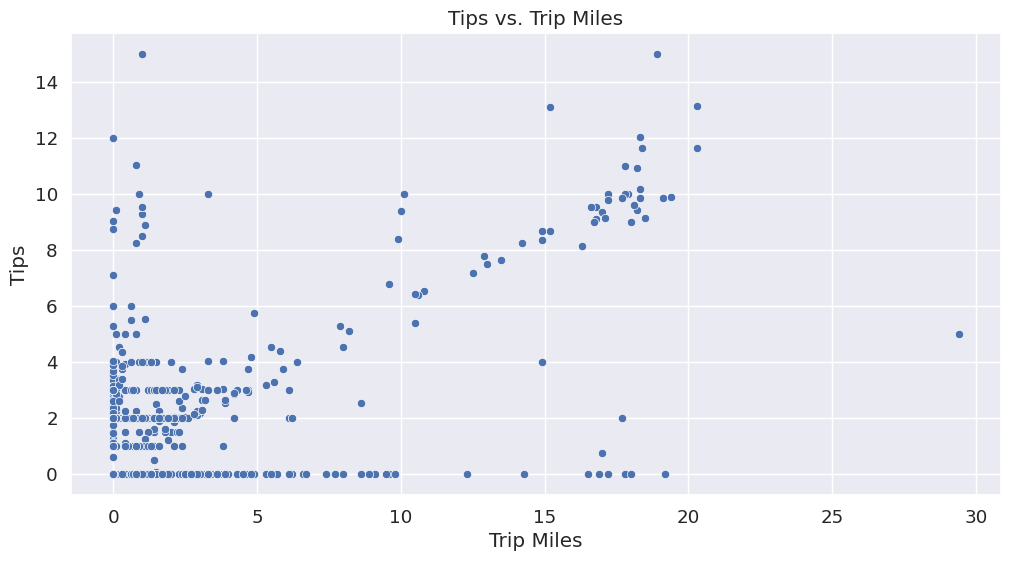

In [92]:
# Convert the Spark DataFrame to a Pandas DataFrame
tip_miles_pd = dftip_miles

# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=tip_miles_pd, x='trip_miles', y='tips')

# Set plot title and labels
plt.title('Tips vs. Trip Miles')
plt.xlabel('Trip Miles')
plt.ylabel('Tips')

# Show the plot
plt.show()

After transformations and filters, we found that trip miles and tips have a weak positive relation. Although a diagonal trend line can be seen, many other scatter points are not close to this line.

### Question 6: What are the common payment types? 

In [17]:
spark.conf.set("spark.sql.shuffle.partitions", "100")
dfpayment_type = taxi.groupBy('payment_type').agg(count('taxi_id').alias("Count")).orderBy(desc("Count")).toPandas()

In [19]:
dfpayment_type

,payment_type,Count
0,Cash,21547502
1,Credit Card,20164538
2,Mobile,1528231
3,Prcard,1361477
4,Unknown,921838
5,No Charge,64087
6,Dispute,16782
7,Pcard,3914
8,Prepaid,1472
9,Split,1397


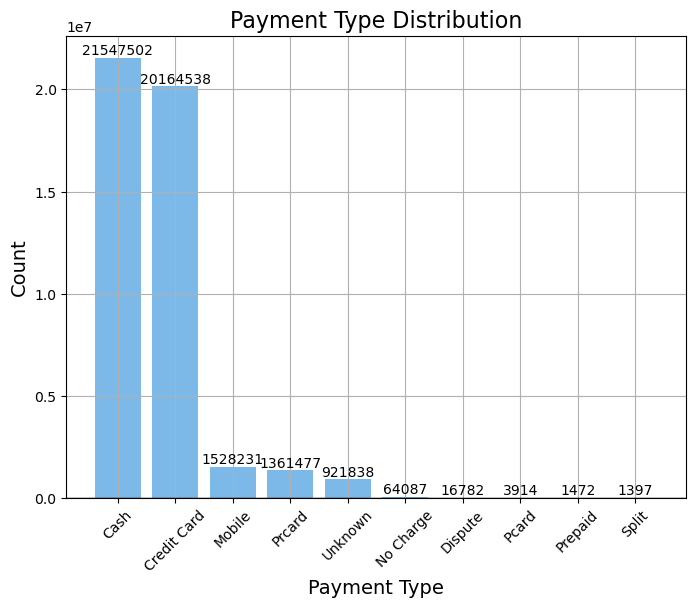

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(dfpayment_type['payment_type'], dfpayment_type['Count'], color='#7CB9E8')

ax.set_xlabel('Payment Type', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

ax.set_title('Payment Type Distribution', fontsize=16)
ax.grid(True)
ax.axhline(y=0, color='black', linewidth=1)

plt.xticks(rotation=45)

# Add value labels to the bars
for i, count in enumerate(dfpayment_type['Count']):
    ax.annotate(count, (i, count), ha='center', va='bottom')

plt.show()

The most common payment types were cash and credit card by far. Other payment types like mobile suggest app or webplatforms, which can be looked into.

***
***
## Phase 3 : Chicago Taxi Services Further Analysis<a id='phase3'></a>


[return to top](#return)


### Report Summary
In this phase, we stand on the Chicago company side, investigating how consumer payment behaviour, and Chicago's taxi company revenue trend over the years.

It aims to explore the Chicago Taxi Market using data retrieved from Big Query. While mobile taxi services like Uber and Lyft have significantly impacted customers’ commuting behaviour, traditional taxi services still dominate a certain portion of the transportation market. Our project focuses on the traditional Chicago taxi market from the perspective of companies, investigating their operational situations and customers’ payment behaviours over the years to help them develop further business strategies.

In [ ]:
#All Dependencies Utilized in the project
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.cloud import bigquery
from sklearn.cluster import KMeans
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.functions import avg, col
from pyspark.sql.functions import to_date, min
from pyspark.sql.functions import year,sum,col
from pyspark.sql.functions import count,sum, year,floor,month
from pyspark.sql.functions import count, floor, month, sum, year
from pyspark.sql.functions import count,sum, year,floor,month,desc
from pyspark.sql.types import StructField, StructType, StringType, IntegerType, DoubleType
from pyspark.sql.types import StructType, StringType, LongType, DoubleType, DateType, TimestampType, StructField

### Project Setup 

In [1]:
from google.cloud import bigquery
from pyspark.sql.types import StructField, StructType, StringType, IntegerType, DoubleType
from pyspark.sql.functions import to_date, min
from pyspark.sql.functions import year,sum,col
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.types import StructType, StringType, LongType, DoubleType, DateType, TimestampType, StructField
#################################################################
client = bigquery.Client()
data = "gs://team7projectdata/notebooks/jupyter/data/"

####### create SparkSession object ##############################
spark = SparkSession.builder \
    .appName("MyApp") \
    .config("spark.jars.packages", "com.google.cloud.spark:spark-bigquery-with-dependencies_2.12:0.23.0") \
    .getOrCreate()

#######################SCHEMA DECLARATION ##########################################

taxi_schema = StructType([
    StructField("taxi_id", StringType(), False),
    StructField("trip_seconds", LongType(), True),
    StructField("trip_miles", DoubleType(), True),
    StructField("pickup_community_area", LongType(), True),
    StructField("dropoff_community_area", LongType(), True),
    StructField("fare", DoubleType(), True),
    StructField("tips", DoubleType(), True),
    StructField("tolls", DoubleType(), True),
    StructField("extras", DoubleType(), True),
    StructField("trip_total", DoubleType(), True),
    StructField("payment_type", StringType(), True),
    StructField("company", StringType(), True),
    StructField("pickup_latitude", DoubleType(), True),
    StructField("pickup_longitude", DoubleType(), True),
    StructField("pickup_location", StringType(), True),
    StructField("dropoff_latitude", DoubleType(), True),
    StructField("dropoff_longitude", DoubleType(), True),
    StructField("dropoff_location", StringType(), True),
    StructField("trip_start_date", DateType(), True),
    StructField("trip_start_time", TimestampType(), True),
    StructField("trip_end_date", DateType(), True),
    StructField("trip_end_time", TimestampType(), True),
])

####################### Loading Data SET ##########################################
taxi = spark.read.format("csv")\
  .option("header", "true")\
  .schema(taxi_schema)\
  .load(data + "chicago-taxi/chicagotaxi.csv")

# taxi.printSchema()
# taxi.limit(2).toPandas()

# Setting the number of shuffle partitions
#spark.conf.set("spark.sql.shuffle.partitions", "20")

####################### Caching ###################################################
taxi.cache()

:: loading settings :: url = jar:file:/usr/lib/spark/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /root/.ivy2/cache
The jars for the packages stored in: /root/.ivy2/jars
com.google.cloud.spark#spark-bigquery-with-dependencies_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-ee9d1886-52c5-4cdc-91b4-e57e4d205a3d;1.0
	confs: [default]
	found com.google.cloud.spark#spark-bigquery-with-dependencies_2.12;0.23.0 in central
:: resolution report :: resolve 339ms :: artifacts dl 6ms
	:: modules in use:
	com.google.cloud.spark#spark-bigquery-with-dependencies_2.12;0.23.0 from central in [default]
	---------------------------------------------------------------------
	|                  |            modules            ||   artifacts   |
	|       conf       | number| search|dwnlded|evicted|| number|dwnlded|
	---------------------------------------------------------------------
	|      default     |   1   |   0   |   0   |   0   ||   1   |   0   |
	---------------------------------------------------------------------
:: retrie

DataFrame[taxi_id: string, trip_seconds: bigint, trip_miles: double, pickup_community_area: bigint, dropoff_community_area: bigint, fare: double, tips: double, tolls: double, extras: double, trip_total: double, payment_type: string, company: string, pickup_latitude: double, pickup_longitude: double, pickup_location: string, dropoff_latitude: double, dropoff_longitude: double, dropoff_location: string, trip_start_date: date, trip_start_time: timestamp, trip_end_date: date, trip_end_time: timestamp]

In [8]:
taxi.count()

45625769

In [2]:
taxi.printSchema()

root
 |-- taxi_id: string (nullable = true)
 |-- trip_seconds: long (nullable = true)
 |-- trip_miles: double (nullable = true)
 |-- pickup_community_area: long (nullable = true)
 |-- dropoff_community_area: long (nullable = true)
 |-- fare: double (nullable = true)
 |-- tips: double (nullable = true)
 |-- tolls: double (nullable = true)
 |-- extras: double (nullable = true)
 |-- trip_total: double (nullable = true)
 |-- payment_type: string (nullable = true)
 |-- company: string (nullable = true)
 |-- pickup_latitude: double (nullable = true)
 |-- pickup_longitude: double (nullable = true)
 |-- pickup_location: string (nullable = true)
 |-- dropoff_latitude: double (nullable = true)
 |-- dropoff_longitude: double (nullable = true)
 |-- dropoff_location: string (nullable = true)
 |-- trip_start_date: date (nullable = true)
 |-- trip_start_time: timestamp (nullable = true)
 |-- trip_end_date: date (nullable = true)
 |-- trip_end_time: timestamp (nullable = true)



***
### 3.1 Clustering Over Pickup Locations <a id='3.1'></a>

As we looked into the concentration of pick up and drop off locations. It was a natural decision to add a clustering model to confirm the popularity of spots.

In [180]:
kmeans = KMeans(n_clusters=2, random_state=843).fit(pandas_df_community[['pickup_longitude','pickup_latitude']])

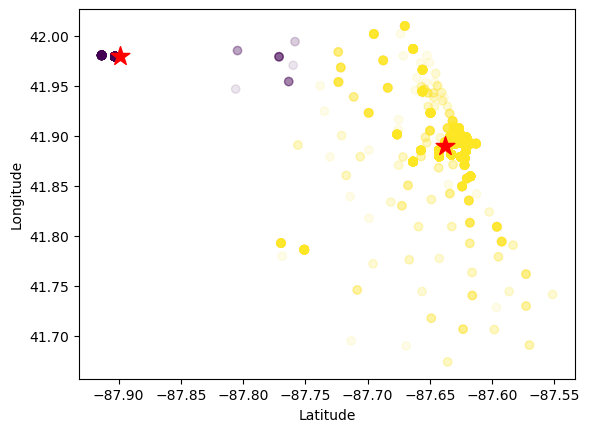

[[-87.89910824  41.97909851]
 [-87.638218    41.88930099]]


In [181]:
# plot the cluster centers
plt.scatter(pandas_df_community['pickup_longitude'], pandas_df_community['pickup_latitude'], alpha=0.1, c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, marker='*', c='red')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()
print(kmeans.cluster_centers_)

Intuitively, we can set k=2 for the KNN algorithm, and found that there are generally two common pickup locations in the area: Chicago O'Hare International Airport and the River North Central Business District (CBD).

In [182]:
labels = kmeans.predict(pandas_df_community[['pickup_longitude','pickup_latitude']])
pandas_df_community['cluster'] = labels

In [188]:
cluster_cnt = pandas_df_community.groupby('cluster').count()\
                        .rename(columns={'taxi_id': 'trip_count'})\
                        .reset_index().set_index('cluster')

avg_miles = pandas_df_community.groupby('cluster')['trip_miles'].mean().reset_index()
avg_miles = avg_miles.rename(columns={'trip_miles': 'avg_trip_miles'})


cluster_cnt_miles = cluster_cnt[['trip_count']] \
                      .merge(avg_miles[['avg_trip_miles']], \
                             left_index=True, right_index=True, how='left')\
                    .reset_index()
# 'ORD Airport' 'MDW Airport' 'Near North Side Loop'
cluster_cnt_miles

,cluster,trip_count,avg_trip_miles
0,0,408,13.342696
1,1,4107,2.705931


In [202]:
avg_fare = pandas_df_community.groupby('cluster')['fare'].mean().reset_index()

avg_tips = pandas_df_community.groupby('cluster')['tips'].mean().reset_index()


avg_fare_tips = avg_fare[['fare']]\
                      .merge(avg_tips[['tips']],\
                             left_index=True, right_index=True, how='left')\
                    .reset_index()

In [207]:
avg_fare_tips

,index,fare,tips
0,0,38.387181,5.969559
1,1,11.770041,1.338580


Text(0.5, 1.0, 'Average Trip Miles of Each Cluster')

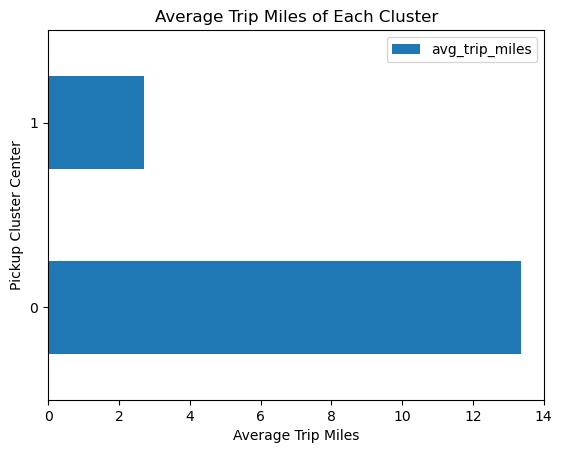

In [204]:
avg_miles[['avg_trip_miles']].plot.barh()
plt.xlabel('Average Trip Miles')
plt.ylabel('Pickup Cluster Center')
plt.title('Average Trip Miles of Each Cluster')

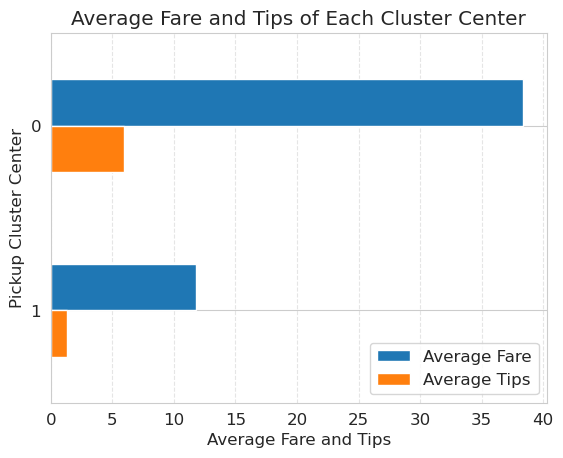

In [223]:
ax = avg_fare_tips[['fare','tips']].plot(kind='barh')
plt.xlabel('Average Fare and Tips')
plt.ylabel('Pickup Cluster Center')
plt.title('Average Fare and Tips of Each Cluster Center')
ax.grid(axis='x', linestyle='--', alpha=0.5)
ax.invert_yaxis()
plt.legend(labels=['Average Fare', 'Average Tips'], loc='lower right')

plt.show()

### 3.2 Payment Method Trends Over the Years <a id='3.2'></a>


[return to top](#return)

Keeping in mind the boom of apps and platforms, looking at the trend of payment types can help determine if certain payment types are rising or declining.

In [3]:
ent_type_trend_withfair = taxi.groupby("payment_type", year("trip_start_date"), 
                                   floor((month("trip_start_date") - 1) / 6 + 1).alias("half_year")) \
  .agg(count("*").alias("num_trips"), sum("trip_total").alias("total_amount")) \
  .orderBy("payment_type", "year(trip_start_date)", "half_year")

In [ ]:
ent_type_trend_withfair = ent_type_trend_withfair.toPandas()
ent_type_trend_withfair

In [77]:
ent_type_trend_withfair["Average_Fare"] = ent_type_trend_withfair["total_amount"] / ent_type_trend_withfair["num_trips"]
ent_type_trend_withfair

,payment_type,year,half_year,num_trips,total_amount,Average Fare,Average_Fare
0,Cash,2018,1,5007796,57871723.31,11.556326,11.556326
1,Cash,2018,2,4624050,56870518.15,12.298854,12.298854
2,Cash,2019,1,3680255,47544358.74,12.918768,12.918768
3,Cash,2019,2,3485521,45351333.35,13.011350,13.011350
4,Cash,2020,1,1281853,18475584.89,14.413185,14.413185
...,...,...,...,...,...,...,...
82,Other Payments,2020,2,103955,2178300.18,20.954261,20.954261
83,Other Payments,2021,1,149019,3327023.82,22.326172,22.326172
84,Other Payments,2021,2,163706,3762692.43,22.984450,22.984450
85,Other Payments,2022,1,154766,3465891.29,22.394397,22.394397


####  Number of Trips with Payment Trend

In [10]:
ent_type_trend_withfair = ent_type_trend_withfair.rename(columns={"year(trip_start_date)": "year"})
ent_type_trend_withfair = ent_type_trend_withfair[ent_type_trend_withfair['year'] != 2023]
payment_type_trend_pivot = ent_type_trend_withfair.pivot_table(index=["year", "half_year"],
                                                          columns="payment_type",
                                                          values="num_trips",
                                                          aggfunc="sum").fillna(0)
payment_type_trend_pivot

payment_type         Cash  Credit Card  Dispute    Mobile  No Charge   Pcard  \
year half_year                                                                 
2018 1          5007796.0    4652145.0   2937.0   47042.0    16259.0  1910.0   
     2          4624050.0    4148738.0   2699.0   64983.0    15820.0  1578.0   
2019 1          3680255.0    3617221.0   2586.0   98307.0    13480.0   426.0   
     2          3485521.0    3361699.0   2902.0  114477.0    11794.0     0.0   
2020 1          1281853.0    1200407.0   1348.0   52945.0     2958.0     0.0   
     2           380941.0     152616.0    315.0    6523.0      600.0     0.0   
2021 1           492194.0     279268.0    822.0   47938.0      355.0     0.0   
     2           851176.0     760863.0   1078.0  212883.0     1002.0     0.0   
2022 1           826216.0     878413.0   1171.0  401022.0      681.0     0.0   
     2           930434.0    1113794.0    928.0  482646.0     1146.0     0.0   

payment_type      Prcard  Prepaid   Split   Unknown  
year half_year                                       
2018 1           27357.0      1.0  1393.0   21696.0  
     2           28772.0    721.0     4.0   30454.0  
2019 1           50847.0    323.0     0.0   41494.0  
     2           85887.0    264.0     0.0   61361.0  
2020 1           77129.0    145.0     0.0   59612.0  
     2          139743.0     13.0     0.0  103955.0  
2021 1          177788.0      4.0     0.0  149019.0  
     2          229890.0      0.0     0.0  163706.0  
2022 1          259248.0      1.0     0.0  154766.0  
     2          284822.0      0.0     0.0  136071.0

In [71]:
#Number of Trips making other_payments
ent_type_trend_withfair["payment_type"] = ent_type_trend_withfair["payment_type"].replace(["No Charge", "Pcard", "Prcard", "Prepaid", "Split", "Unknown"], "Other Payments")
payment_type_trend_pivot = ent_type_trend_withfair.pivot_table(index=["year", "half_year"],
                                                               columns="payment_type",
                                                               values="num_trips",
                                                               aggfunc="sum").fillna(0)
payment_type_trend_pivot

payment_type       Cash  Credit Card  Dispute  Mobile  Other Payments
year half_year                                                       
2018 1          5007796      4652145     2937   47042           68616
     2          4624050      4148738     2699   64983           77349
2019 1          3680255      3617221     2586   98307          106570
     2          3485521      3361699     2902  114477          159306
2020 1          1281853      1200407     1348   52945          139844
     2           380941       152616      315    6523          244311
2021 1           492194       279268      822   47938          327166
     2           851176       760863     1078  212883          394598
2022 1           826216       878413     1171  401022          414696
     2           930434      1113794      928  482646          422039

/tmp/ipykernel_3081/320141959.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['${:,.0f} million'.format(x/1000000) for x in y_values])


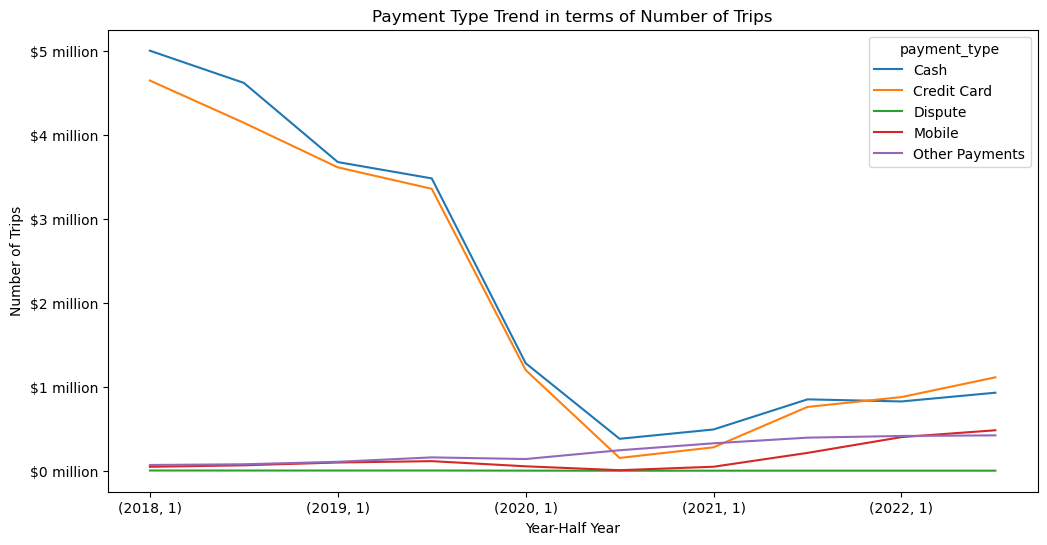

In [76]:
ax = payment_type_trend_pivot.plot(kind="line", figsize=(12,6))
ax.set_ylabel("Number of Trips")

#rescaling Y axis
y_values = ax.get_yticks()
ax.set_yticklabels(['${:,.0f} million'.format(x/1000000) for x in y_values])
ax.set_xlabel("Year-Half Year")
ax.set_title("Payment Type Trend in terms of Number of Trips")

plt.show()

One of the more obvious points of the graph, is the consistent drop in the middle years. Primarily caused by the pandemic, a decline of taxi services can be seen. But Mobile payment interestingly has seen gradual increase and could be an opportunity.
***

####  Revenue with Payment Type Trend

Looking at the quantity of trips by payment inspired us to look at the quantity of fare by payment type.

In [37]:
#payment_type_trend_amount wise total_amount
payment_type_trend_amount = ent_type_trend_withfair.pivot_table(index=["year", "half_year"],
                                                               columns="payment_type",
                                                               values="total_amount",
                                                               aggfunc="sum").fillna(0)
payment_type_trend_amount

payment_type           Cash   Credit Card   Dispute      Mobile  \
year half_year                                                    
2018 1          57871723.31  9.211900e+07  44723.65   950420.61   
     2          56870518.15  8.479236e+07  43878.25  1338122.73   
2019 1          47544358.74  7.401514e+07  43511.82  1963572.44   
     2          45351333.35  7.029549e+07  43012.89  2237232.59   
2020 1          18475584.89  2.287321e+07  17342.79   943039.11   
     2           5353043.70  3.263925e+06   7062.02   120794.39   
2021 1           7721801.93  7.698070e+06  19001.06   883599.59   
     2          14584881.30  2.240813e+07  19262.17  4172568.74   
2022 1          14255097.75  2.729116e+07  23522.36  7047660.10   
     2          15166440.29  3.586351e+07  20643.77  9033232.96   

payment_type    Other Payments  
year half_year                  
2018 1               934059.18  
     2              1049548.58  
2019 1              1530798.56  
     2              2672929.86  
2020 1              2528910.46  
     2              4971099.75  
2021 1              7353741.70  
     2              9355502.69  
2022 1              9740874.80  
     2             10276976.18

/tmp/ipykernel_3081/4238069732.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['${:,.0f} million'.format(x/10000000) for x in y_values])


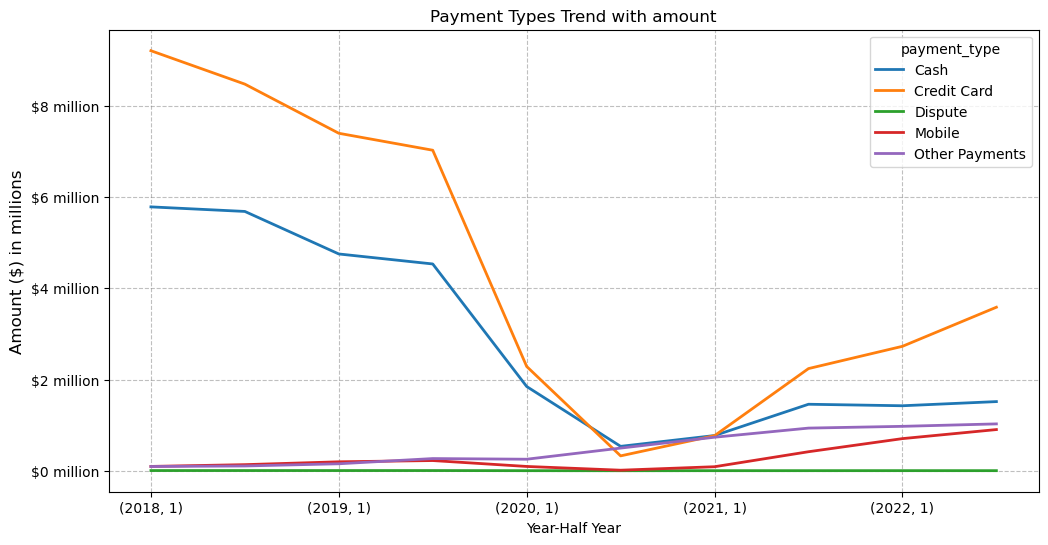

In [79]:
#trend plot payment type and amount earned or amount of revenue gained
ax = payment_type_trend_amount.plot(kind="line", figsize=(12,6), linewidth=2)
ax.set_ylabel("Amount ($) in millions", fontsize=12)
y_values = ax.get_yticks()
#Y axis rescaling
y_values = ax.get_yticks()
ax.set_yticklabels(['${:,.0f} million'.format(x/10000000) for x in y_values])
ax.set_xlabel("Year-Half Year")
ax.set_title("Payment Types Trend with amount")
ax.grid(True, linestyle='--', color='gray', alpha=0.5)
plt.show()



Conclusion from the above graph we can see that :

Info: Other_Payments consists - No Charge, Pcard, Prcard, Prepaid, Split, Unknown (clubbed together as other_payments)

1. The decline in taxi services revenue seen in the plotted trend may be attributed to the impact of the COVID-19 pandemic, possibly due to government-mandated lockdowns that resulted in decreased mobility.

2. There is evidence of recovery in the taxi services industry as the number of cars on the road increased and COVID-19 cases decreased.

3. The payment mode trends suggest that Cash and Credit payments were the dominant modes of transaction, with the growth of online transactions and credit card usage showing an upward trend since the drop seen in 2020-21. Conversely, cash transactions have not shown significant growth after the second half of 2021.

4. Similar trend graph can be seen for number of trips.

5. It is worth noting that the "Other_Payments" category, which consists of No Charge, Pcard, Prcard, Prepaid, Split, and Unknown transactions, has shown consistent growth throughout the plotted time period. 

Overall, the trend graph suggests that the taxi services industry is recovering from the impact of COVID-19, with a shift towards online payment modes and increased usage of other payment options. Similar trends can also be observed for the number of trips taken.
***

### 3.3 Correlation between Duration and Fare & Tips <a id='3.3'></a>

[return to top](#return)

We wanted to continue to examine the correlation between the more common variables. Duration of trips was one that was not explored in the previous phase.

#### The Distribution of Trip Duration

In [7]:
taxi.describe(['trip_seconds']).show()

+-------+------------------+
|summary|      trip_seconds|
+-------+------------------+
|  count|          45606635|
|   mean|  893.965481886572|
| stddev|1445.0402475692422|
|    min|                 0|
|    max|             86400|
+-------+------------------+



In [8]:
taxi.where(taxi.trip_seconds > 18000).describe(['trip_seconds']).show()

+-------+------------------+
|summary|      trip_seconds|
+-------+------------------+
|  count|             25018|
|   mean| 47782.84766967783|
| stddev|17773.333883309457|
|    min|             18003|
|    max|             86400|
+-------+------------------+



In [9]:
# Also check how many trips did not start, which means trip seconds = 0. The total number is 731538, dropped them.
taxi.where(taxi.trip_seconds == 0).describe(['trip_seconds']).show()

+-------+------------+
|summary|trip_seconds|
+-------+------------+
|  count|      731538|
|   mean|         0.0|
| stddev|         0.0|
|    min|           0|
|    max|           0|
+-------+------------+



/tmp/ipykernel_2733/1267844154.py:9: UserWarning:                               

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pandas_df)


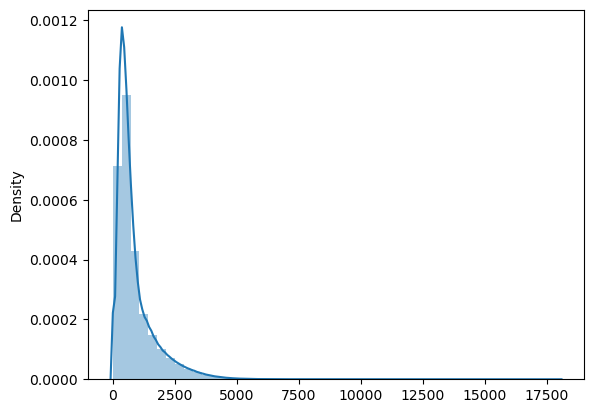

In [10]:
# Select a single column and sample and convert to pandas
sample_df = taxi.where((taxi.trip_seconds!= 0) & (taxi.trip_seconds <= 18000)).select(['trip_seconds']).sample(False, 0.5, 42)
pandas_df = sample_df.toPandas()

# Plot distribution of pandas_df and display plot
sns.distplot(pandas_df)
plt.xlabel("Trip Seconds")
plt.title("Distribution of Trip Duration")
plt.show()

X-axis is the trip duration in seconds. We can see that this plot shows a positive skewness where most of the trips are under 41.6 mins(2500s). The mean of around 14.8 mins(890s) indicates that most trips are not long distance trips. 
***

#### Relationship Between Fares & Duration.

In [125]:
sample_df = taxi.where((taxi.trip_seconds!= 0) & (taxi.trip_seconds <= 18000)).select(['trip_seconds', 'fare']).sample(False, 0.5, 42)
#To pandas
pandas_df = sample_df.toPandas()

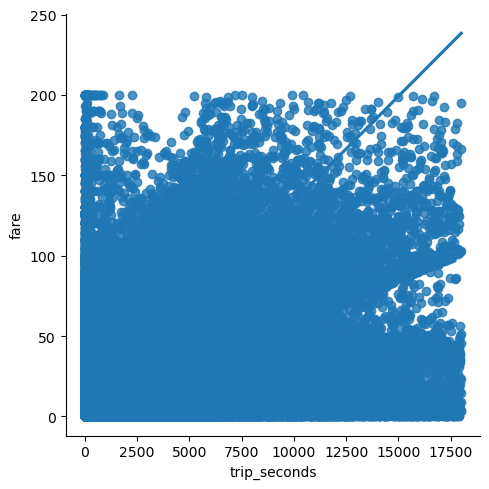

In [ ]:
# Linear model plot of pandas_df
sns.lmplot(x='trip_seconds', y= 'fare', data=pandas_df)
plt.show()

We can see the fare has a weak correlation with duration. So the trip duration only can not be viewed as the most important factor  for traditional taxi company.
***

####  Relationship Between Tips & Duration.

In [127]:
sample_df = taxi.where((taxi.trip_seconds!= 0) & (taxi.trip_seconds <= 18000)).select(['trip_seconds', 'tips']).sample(False, 0.5, 42)
pandas_df = sample_df.toPandas()

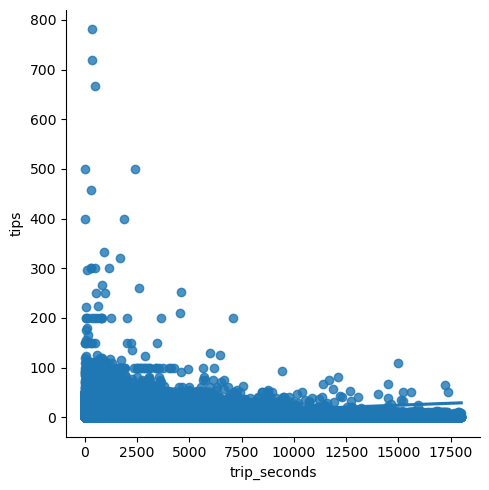

In [128]:
# Linear model plot of pandas_df
sns.lmplot(x='trip_seconds', y= 'tips', data=pandas_df)
plt.show()

Tips do not have an strong relationship with duration either.
***

### 3.4 Chicago Taxi Company Wise Trends <a id='3.4'></a>


[return to top](#return)

Not observing any clear positive relations from the variables led us to think about narrowing down the scale. We chose to focus on companies individually and look at the top performing groups. We extract year, number of trips and total fare for the top 5 companies of each year.

In [24]:
company_trips_over_year = taxi.groupby("company", year("trip_start_date"))\
  .agg(count("*").alias("num_trips"), sum("trip_total").alias("total_amount")) \
  .orderBy("company", "year(trip_start_date)")

In [25]:
company_trips_over_year = company_trips_over_year.toPandas()
company_trips_over_year

,company,year(trip_start_date),num_trips,total_amount
0,0118 - 42111 Godfrey S.Awir,2018,1005,14364.02
1,0694 - 59280 Chinesco Trans Inc,2018,793,9548.69
2,1085 - 72312 N and W Cab Co,2018,5397,56498.28
3,1085 - 72312 N and W Cab Co,2019,4874,52546.02
4,1085 - 72312 N and W Cab Co,2020,231,2553.21
...,...,...,...,...
252,U Taxicab,2020,12720,299784.33
253,U Taxicab,2021,49710,1229509.40
254,U Taxicab,2022,44825,1277494.84
255,Yellow Cab,2018,714606,10082726.38


####  Number Of Trips, Revenue Earned from Companies


[return to top](#return)

In [26]:
pivot_company_year_df = company_trips_over_year.pivot(index=["year(trip_start_date)"], columns="company", values="num_trips")
company_trip_trend_pivot = company_trips_over_year.pivot_table(index=["year(trip_start_date)"],
                                                          columns="company",
                                                          values="num_trips",
                                                          aggfunc="sum").fillna(0)
company_trip_trend_pivot

company,0118 - 42111 Godfrey S.Awir,0694 - 59280 Chinesco Trans Inc,1085 - 72312 N and W Cab Co,1469 - 64126 Omar Jada,2092 - 61288 Sbeih company,2192 - 73487 Zeymane Corp,"2241 - 44667 - Felman Corp, Manuel Alonso",24 Seven Taxi,2733 - 74600 Benny Jona,2809 - 95474 C & D Cab Co Inc.,...,Sun Taxi,Taxi Affiliation Service Yellow,Taxi Affiliation Services,Taxicab Insurance Agency Llc,"Taxicab Insurance Agency, LLC",Top Cab,Top Cab - 312 MM Corp,Top Cab Affiliation,U Taxicab,Yellow Cab
year(trip_start_date),,,,,,,,,,,,,,,,,,,,,
2018,1005.0,793.0,5397.0,4425.0,3573.0,1644.0,71.0,188372.0,2756.0,6.0,...,1162727.0,1111160.0,2415904.0,0.0,35262.0,0.0,3307.0,156075.0,0.0,714606.0
2019,0.0,0.0,4874.0,2771.0,3061.0,0.0,0.0,149711.0,2174.0,0.0,...,1151088.0,318647.0,3332952.0,0.0,321314.0,0.0,0.0,187192.0,4264.0,1699.0
2020,0.0,0.0,231.0,0.0,594.0,0.0,0.0,29883.0,710.0,0.0,...,237938.0,2067.0,987080.0,0.0,123650.0,0.0,0.0,59154.0,12720.0,0.0
2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46123.0,1085.0,0.0,...,237995.0,0.0,962802.0,0.0,194923.0,5.0,0.0,80107.0,49710.0,0.0
2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50822.0,1028.0,0.0,...,595572.0,0.0,1200333.0,246429.0,217891.0,4395.0,0.0,78124.0,44825.0,0.0
2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.0,0.0,22.0,6.0,0.0,0.0,0.0,2.0,0.0,0.0


In [91]:
company_fare_over_year = taxi.groupby("company", year("trip_start_date"))\
  .agg(count("*").alias("num_trips"), sum("fare").alias("total_fare_year")) \
  .orderBy(desc("total_fare_year"), "year(trip_start_date)")

In [92]:
company_fare_pd = company_fare_over_year.toPandas()
company_fare_pd = company_fare_pd.rename(columns={"year(trip_start_date)": "year"})
company_fare_pd = company_fare_pd[company_fare_pd['year'] != 2023]

In [93]:
company_fare_pd

,company,year,num_trips,total_fare_year
0,Taxi Affiliation Services,2019,3333237,43325139.45
1,Flash Cab,2018,2625578,34758901.17
2,Taxi Affiliation Services,2018,2416287,29943695.55
3,Chicago Carriage Cab Corp,2018,2182649,29682185.69
4,Flash Cab,2019,2019892,28111724.73
...,...,...,...,...
250,4732 - Maude Lamy,2021,11,35.75
252,Top Cab,2021,5,23.50
254,Chicago Carriage Cab Corp,2022,4,19.25
255,Chicago Carriage Cab Corp,2021,1,3.25


In [109]:
top_5_per_year = company_fare_pd.groupby('year').apply(lambda x: x.nlargest(5, 'total_fare_year')).reset_index(drop=True)
top_5_per_year['Fare_by_trip'] = top_5_per_year['total_fare_year']/top_5_per_year['num_trips']
top_5_per_year

,company,year,num_trips,total_fare_year,Fare_by_trip
0,Flash Cab,2018,2625518,34743090.46,13.232852
1,Taxi Affiliation Services,2018,2415904,29877560.35,12.367031
2,Chicago Carriage Cab Corp,2018,2182430,29652482.98,13.586911
3,Medallion Leasin,2018,1306532,16999576.95,13.011221
4,Sun Taxi,2018,1162727,16116500.13,13.860949
5,Taxi Affiliation Services,2019,3332952,43194689.27,12.959889
6,Flash Cab,2019,2019836,28097794.38,13.910929
7,Chicago Carriage Cab Corp,2019,1684379,23182778.82,13.763398
8,Sun Taxi,2019,1151088,16656523.74,14.470244
9,Medallion Leasin,2019,1064629,14178345.70,13.317640


In [108]:
pivot_top_5_companies = pd.pivot_table(top_5_per_year, values='total_fare_year', index='year', columns='company')
pivot_top_5_companies

company,Chicago Carriage Cab Corp,Chicago Independents,City Service,Flash Cab,Medallion Leasin,Sun Taxi,Taxi Affiliation Services,"Taxicab Insurance Agency, LLC"
year,,,,,,,,
2018,29652482.98,NaN,NaN,34743090.46,16999576.95,16116500.13,29877560.35,NaN
2019,23182778.82,NaN,NaN,28097794.38,14178345.70,16656523.74,43194689.27,NaN
2020,3321310.84,NaN,NaN,11068790.74,2762981.83,3195469.11,13176274.32,NaN
2021,NaN,NaN,3669851.95,18309250.90,NaN,4289024.96,17243088.76,3641551.99
2022,NaN,5256373.58,9901648.91,23815271.74,NaN,10968774.18,23280856.26,NaN


In [133]:

grouped = top_5_per_year.groupby(['year', 'company'])['total_fare_year'].sum().reset_index()
grouped

,year,company,total_fare_year
0,2018,Chicago Carriage Cab Corp,29652482.98
1,2018,Flash Cab,34743090.46
2,2018,Medallion Leasin,16999576.95
3,2018,Sun Taxi,16116500.13
4,2018,Taxi Affiliation Services,29877560.35
5,2019,Chicago Carriage Cab Corp,23182778.82
6,2019,Flash Cab,28097794.38
7,2019,Medallion Leasin,14178345.70
8,2019,Sun Taxi,16656523.74
9,2019,Taxi Affiliation Services,43194689.27


/tmp/ipykernel_2733/532474902.py:12: UserWarning:

FixedFormatter should only be used together with FixedLocator



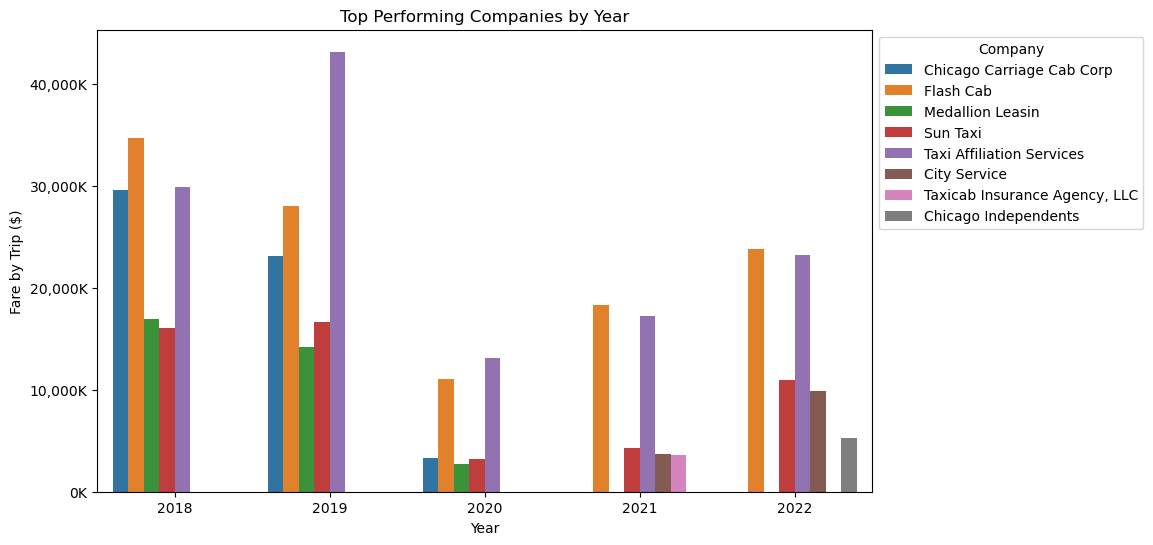

In [139]:
fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(data=grouped, x='year', y='total_fare_year', hue='company', ax=ax)

ax.set_xlabel('Year')
ax.set_ylabel('RevenueTrip ($)')
ax.set_title('Top Performing Companies by Year')
ax.legend(title='Company', bbox_to_anchor=(1, 1), loc='upper left')

# Format y-axis labels
ylabels = ['{:,.0f}K'.format(x/1000) for x in ax.get_yticks()]
ax.set_yticklabels(ylabels)

plt.show()

Plotting the top performing companies by year gave us a glance of the players who consistently stay at the top and bounce back. Although some of them exit out the market for various reasons, this is a good indication of who is doing well at adapting the market and setting their companies forward.

In [124]:
import matplotlib.pyplot as plt
# Calculate total revenue by company
revenue_by_company = taxi.groupBy("company") \
                           .agg(avg("trip_seconds").alias("avg_trip_seconds"),sum("trip_total").alias("total_revenue")) \
                           .orderBy(desc("total_revenue")) \
                           .limit(5)

# Top 5 companies with the higest revenue
revenue_by_company = revenue_by_company.toPandas()
revenue_by_company.head()



,company,avg_trip_seconds,total_revenue
0,Taxi Affiliation Services,843.151408,1.526978e+08
1,Flash Cab,954.210830,1.313663e+08
2,Chicago Carriage Cab Corp,900.261070,6.861732e+07
3,Sun Taxi,1002.937947,6.316320e+07
4,Medallion Leasin,892.285163,5.950404e+07


/tmp/ipykernel_3081/1292396753.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


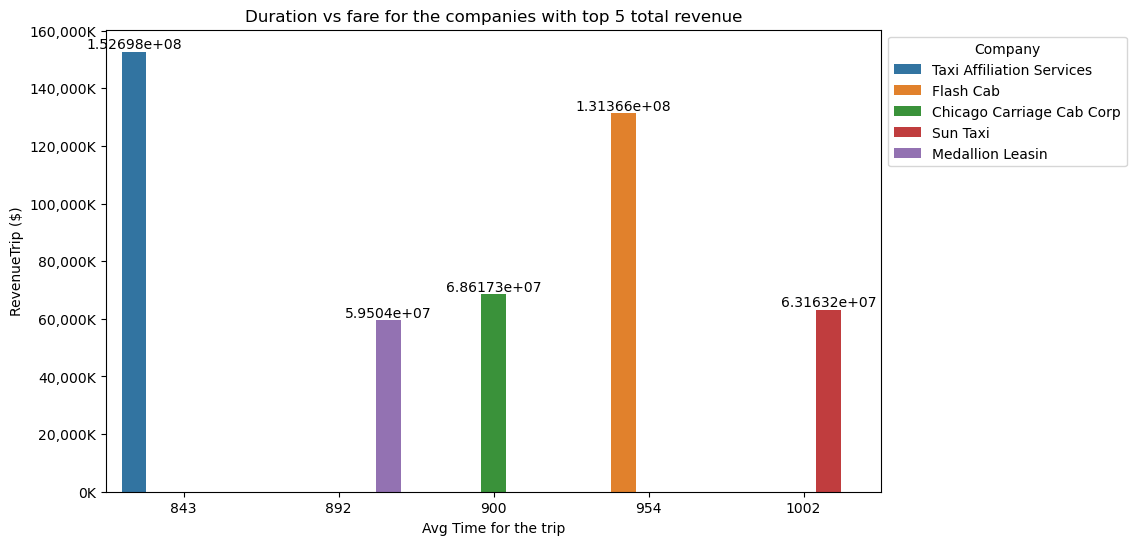

In [137]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(data=revenue_by_company, x=revenue_by_company['avg_trip_seconds'].astype(int), y='total_revenue', hue='company', ax=ax)
xlabels = revenue_by_company['avg_trip_seconds'].astype(int)
ax.set_xlabel('Duration ({}s)'.format(xlabels.iloc[0]))
ax.set_xlabel('Avg Time for the trip')
ax.set_ylabel('RevenueTrip ($)')
ax.set_title('Duration vs fare for the companies with top 5 total revenue')
ax.legend(title='Company', bbox_to_anchor=(1, 1), loc='upper left')

for p in ax.containers:
    ax.bar_label(p, label_type='edge')


ylabels = ['{:,.0f}K'.format(x/1000) for x in ax.get_yticks()]
ax.set_yticklabels(ylabels)

plt.show()



Filtering the top 5 companies with the highest revenue, identifying the correlation between the duration and fare:
Fare does not have a direct relationship with duration, the company with the highest revenue even comes with the shortest duration trip time.
***

## Conclusion <a id='conclusions'></a>


[return to top](#return)

In this notebook, we used taxi trips for the Chicago dataset and selected data from 2018 to 2022 to explore data. By answering six questions about factors such as fares, trip distance, location, and payment types, we tried to find the traditional taxi business pattern in Chicago now. The questions and answers are the following:

1. At what price point are customers most likely to take a taxi?

We find two distinct peaks: About 10 dollars and about 45 dollars.

2. What is the relation between fares and miles?

In general, longer distances result in higher fares. However, there are still other factors that can affect fares. 

3. What are the popular pickup and dropoff locations?

A popular pickup area is also a popular dropoff area, for example, areas near North Side, Loop, Near West Side, and O'Hare.

4. Which Taxi Companies have the highest average tips?

We ranked the top five companies that have higher average tips, C&D Cab Co Inc. was the highest. The highest average tip is 5.99 dollars for each trip.

5. What is the correlation between Company, Miles, and Tips?

Trip miles and tips have a weak positive relation.

6. What are the common payment types?

The most common payment types were cash and credit card by far.

***

We then took a stand on the Chicago Taxi companies' side, analyzing how these companies operate over the years. 

1. Using K-means clustering, we found the centroids for pickup and dropoff location center in Chicago. As we thought, the airport and CBD are the popular areas.
2. Payment type indicates a slight window of opportunity in mobile payments. From both quantity of trips and fares, decline was seen in 2020, but slightly increase again after covid
3. The distribution of duration seems to peak at 15 minutes. Duration has no clear correlation with either fares or tips.
4. Top performing companies of each year mostly stays the same, even though the fare(revenue) declines over the years, there are few companies that don't bounce back and new companies come into the spotlight. 
5. Top perfomring companies show that there is no clear relationship with trip duration and revenue. (Assuming fare generated value is revenue)



Based on the conclusions drawn above, traditional taxi companies can increase their revenue through various approaches:

1. Expand services beyond airports and central business districts to cater to a broader range of locations.
2. Develop user-friendly apps that offer convenient mobile payment options, such as Apple Pay and credit card payments.
Despite the rise of ride-sharing services like Uber and Lyft, traditional taxi companies maintain unique advantages. They have greater flexibility in tailoring strategies for individual cities, and their ability to be hailed on the street appeals to people when they have poor connections with internet or save the time to book a car online.
***

## Challenge <a id='challenge'></a>



We faced with a size challenge of which the dataset is over 21GB, it is time-consuming to execute each plot or certain codes. To handle this issue, we partitioned the dataset into 77 partitions in order to better process the dataset, addtionally we created problem specific dataframes as well.

Chicago Taxi Market is a huge market with many topics involved. To make the storyline simple and coherent, we start with some most common attributes eg, tips, duration, fare, etc, and figure out the correlation between them. We then prob the companies' aspects, to further explore the consumers' payment behaviours and companies' operating situation over year trends to better help the companies understand the market growth.

MoreOver:
Collaborating on a main notebook is also not a seamless process while working in GCP Environment or might be possible at higher level.
***

## Reference <a id='references'></a>
1. https://data.cityofchicago.org/
2. https://data.cityofchicago.org/Transportation/Taxi-Trips/wrvz-psew
3. https://github.com/soltaniehha/Big-Data-Analytics-for-Business/blob/master/08-EDA-and-Data-Sources/01-EDA.ipynb
4. https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/Chicago_Community_Areas.svg/690px-Chicago_Community_Areas.svg.png
5. https://chat.openai.com/chat, for learning upon running pyspark faster, to lower computation power & learn new concepts of working with big datasets, utilized for learning better graph techniques.


[return to top](#return)
***
***